In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE, SelectKBest, mutual_info_classif
from imblearn.over_sampling import SMOTE

In [ ]:
# Supervised Model Training Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
# Model Evaluation Libraries
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, f1_score, precision_score, recall_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score

In [ ]:
# Hyperparameter Libraries
!pip install scikit-optimize
!pip install optuna
!pip install hyperopt
from skopt import BayesSearchCV
import optuna
from hyperopt import fmin, tpe, hp, Trials

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Research_Data/Implementing Smart Irrigation System: Real Time Moisture Dependent Decision Making for Irrigation through AI based Weather station/cucumber_data.xlsx")
df.head()

crops  soil1  soil2  soil3  soil4  avg_soil rain  pir motion  temp  ...  \
0  Cucumber     45     50     48     47        47   No   ON     No  29.3  ...   
1  Cucumber     10     10     10     10        10   No  OFF     No  26.7  ...   
2  Cucumber     10     10     10     10        10   No  OFF     No  26.7  ...   
3  Cucumber     10     10     10     10        10   No  OFF     No  26.7  ...   
4  Cucumber     10     10     10     10        10   No  OFF     No  26.7  ...   

   Unnamed: 13 Unnamed: 14  Unnamed: 15  Unnamed: 16  Unnamed: 17  \
0          NaN         NaN          NaN          NaN          NaN   
1          NaN         NaN          NaN          NaN          NaN   
2          NaN         NaN          NaN          NaN          NaN   
3          NaN         NaN          NaN          NaN          NaN   
4          NaN         NaN          NaN          NaN          NaN   

   Unnamed: 18  Unnamed: 19  Unnamed: 20  Unnamed: 21           timestamp  
0          NaN          NaN          NaN          NaN 2025-07-27 14:01:04  
1          NaN          NaN          NaN          NaN 2025-07-27 14:02:32  
2          NaN          NaN          NaN          NaN 2025-07-27 14:02:33  
3          NaN          NaN          NaN          NaN 2025-07-27 14:02:35  
4          NaN          NaN          NaN          NaN 2025-07-27 14:02:36  

[5 rows x 23 columns]

In [ ]:
df.shape

(60087, 23)

In [ ]:
print(df.columns)

Index(['crops', 'soil1', 'soil2', 'soil3', 'soil4', 'avg_soil', 'rain', 'pir',
       'motion', 'temp', 'humidity', 'Status of Sprinkler', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'timestamp'],
      dtype='object')


In [ ]:
print(df.columns[0])

crops


In [ ]:
# Step 3: Select a column range (e.g., from column index 2 to 7)
selected_df = df.iloc[:, 0:12]  # Note: Python index is zero-based, so 2:8 includes columns 2,3,4,5,6,7

# Optional: Rename columns or reset index if needed
# selected_df.columns = ['new1', 'new2', ...]
# selected_df.reset_index(drop=True, inplace=True)

# Step 4: Save to new CSV
selected_df.to_csv("/content/drive/MyDrive/Research_Data/Implementing Smart Irrigation System: Real Time Moisture Dependent Decision Making for Irrigation through AI based Weather station/final_cucumber_data.csv", index=False)

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Research_Data/Implementing Smart Irrigation System: Real Time Moisture Dependent Decision Making for Irrigation through AI based Weather station/final_cucumber_data.csv")
data.head()

crops  soil1  soil2  soil3  soil4  avg_soil rain  pir motion  temp  \
0  Cucumber     45     50     48     47        47   No   ON     No  29.3   
1  Cucumber     10     10     10     10        10   No  OFF     No  26.7   
2  Cucumber     10     10     10     10        10   No  OFF     No  26.7   
3  Cucumber     10     10     10     10        10   No  OFF     No  26.7   
4  Cucumber     10     10     10     10        10   No  OFF     No  26.7   

   humidity Status of Sprinkler  
0      65.2                 OFF  
1      73.0                  ON  
2      73.0                  ON  
3      73.0                  ON  
4      73.0                  ON

In [ ]:
data.shape

(60087, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60087 entries, 0 to 60086
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   crops                60087 non-null  object 
 1   soil1                60087 non-null  int64  
 2   soil2                60087 non-null  int64  
 3   soil3                60087 non-null  int64  
 4   soil4                60087 non-null  int64  
 5   avg_soil             60087 non-null  int64  
 6   rain                 60087 non-null  object 
 7   pir                  60087 non-null  object 
 8   motion               60087 non-null  object 
 9   temp                 60087 non-null  float64
 10  humidity             60087 non-null  float64
 11  Status of Sprinkler  60087 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 5.5+ MB


In [ ]:
data.describe()

soil1         soil2         soil3         soil4      avg_soil  \
count  60087.000000  60087.000000  60087.000000  60087.000000  60087.000000   
mean      50.214705     45.858771     37.452877     43.463312     43.902208   
std       24.949947     27.758085     27.171517     27.168879     20.921028   
min       10.000000     10.000000     10.000000     10.000000     10.000000   
25%       19.000000     13.000000     10.000000     10.000000     31.000000   
50%       58.000000     65.000000     22.000000     57.000000     48.000000   
75%       70.000000     70.000000     67.000000     67.000000     60.000000   
max       90.000000     85.000000     87.000000     85.000000     83.000000   

               temp      humidity  
count  60087.000000  60087.000000  
mean      29.169300     92.746954  
std        0.877467     10.193430  
min       26.700000     65.000000  
25%       29.300000     98.000000  
50%       29.400000     98.000000  
75%       29.800000     98.000000  
max       30.200000     98.000000

In [ ]:
# 3. Handle Missing Values
# Fill numeric columns with mean
data.fillna(df.mean(numeric_only=True), inplace=True)

In [ ]:
# Fill categorical columns with mode
for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

/tmp/ipython-input-1654358416.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [ ]:
# 4. Encode Categorical Variables
# Label Encoding for binary categorical variables
label_enc = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    if data[col].nunique() == 2:  # Binary categorical
        data[col] = label_enc.fit_transform(data[col])
    else:
        # One-hot encoding for multi-class categorical
        data = pd.get_dummies(data, columns=[col], drop_first=True)

In [ ]:
# 5. Feature Scaling
# Standardization (Z-score scaling)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Or use Normalization (MinMax scaling)
# scaler = MinMaxScaler()
# scaled_data = scaler.fit_transform(df)

scaled_data = pd.DataFrame(scaled_data, columns=data.columns)

In [ ]:
scaled_data.head()

soil1     soil2     soil3     soil4  avg_soil      rain        pir  \
0 -0.209008  0.149191  0.388172  0.130175  0.148072 -0.519192  24.492244   
1 -1.611829 -1.291842 -1.010363 -1.231688 -1.620498 -0.519192  -0.040829   
2 -1.611829 -1.291842 -1.010363 -1.231688 -1.620498 -0.519192  -0.040829   
3 -1.611829 -1.291842 -1.010363 -1.231688 -1.620498 -0.519192  -0.040829   
4 -1.611829 -1.291842 -1.010363 -1.231688 -1.620498 -0.519192  -0.040829   

     motion      temp  humidity  Status of Sprinkler  
0 -0.040624  0.148953 -2.702445            -0.604378  
1 -0.040624 -2.814145 -1.937240             1.654595  
2 -0.040624 -2.814145 -1.937240             1.654595  
3 -0.040624 -2.814145 -1.937240             1.654595  
4 -0.040624 -2.814145 -1.937240             1.654595

In [ ]:
# 6. Split Dataset
X = scaled_data.drop("Status of Sprinkler", axis=1)   # Replace target_column with your label column
y = scaled_data["Status of Sprinkler"]

NameError: name 'scaled_data' is not defined

In [ ]:
X

soil1     soil2     soil3     soil4  avg_soil      rain        pir  \
0     -0.209008  0.149191  0.388172  0.130175  0.148072 -0.519192  24.492244   
1     -1.611829 -1.291842 -1.010363 -1.231688 -1.620498 -0.519192  -0.040829   
2     -1.611829 -1.291842 -1.010363 -1.231688 -1.620498 -0.519192  -0.040829   
3     -1.611829 -1.291842 -1.010363 -1.231688 -1.620498 -0.519192  -0.040829   
4     -1.611829 -1.291842 -1.010363 -1.231688 -1.620498 -0.519192  -0.040829   
...         ...       ...       ...       ...       ...       ...        ...   
60082  0.191797  0.761631 -1.010363  0.498247  0.148072 -0.519192  -0.040829   
60083  0.191797  0.797656 -1.010363  0.498247  0.148072 -0.519192  -0.040829   
60084  0.231878  0.797656 -1.010363  0.498247  0.148072 -0.519192  -0.040829   
60085  0.231878  0.797656 -1.010363  0.498247  0.148072 -0.519192  -0.040829   
60086  0.231878  0.797656 -1.010363  0.498247  0.148072 -0.519192  -0.040829   

         motion      temp  humidity  
0     -0.040624  0.148953 -2.702445  
1     -0.040624 -2.814145 -1.937240  
2     -0.040624 -2.814145 -1.937240  
3     -0.040624 -2.814145 -1.937240  
4     -0.040624 -2.814145 -1.937240  
...         ...       ...       ...  
60082 -0.040624  0.148953  0.515341  
60083 -0.040624  0.148953  0.515341  
60084 -0.040624  0.148953  0.515341  
60085 -0.040624  0.148953  0.515341  
60086 -0.040624  0.148953  0.515341  

[60087 rows x 10 columns]

In [ ]:
y

0       -0.604378
1        1.654595
2        1.654595
3        1.654595
4        1.654595
           ...   
60082   -0.604378
60083   -0.604378
60084   -0.604378
60085   -0.604378
60086   -0.604378
Name: Status of Sprinkler, Length: 60087, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTraining Set Shape:", X_train.shape, y_train.shape)
print("Testing Set Shape:", X_test.shape, y_test.shape)


Training Set Shape: (48069, 10) (48069,)
Testing Set Shape: (12018, 10) (12018,)


/tmp/ipython-input-325638471.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Status of Sprinkler", data=scaled_data, palette="Set2")


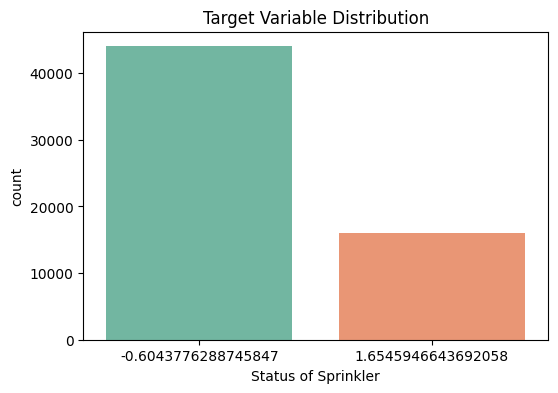

In [ ]:
# 4. Distribution of Target Column (replace 'target_column')
if "Status of Sprinkler" in scaled_data.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x="Status of Sprinkler", data=scaled_data, palette="Set2")
    plt.title("Target Variable Distribution")
    plt.show()

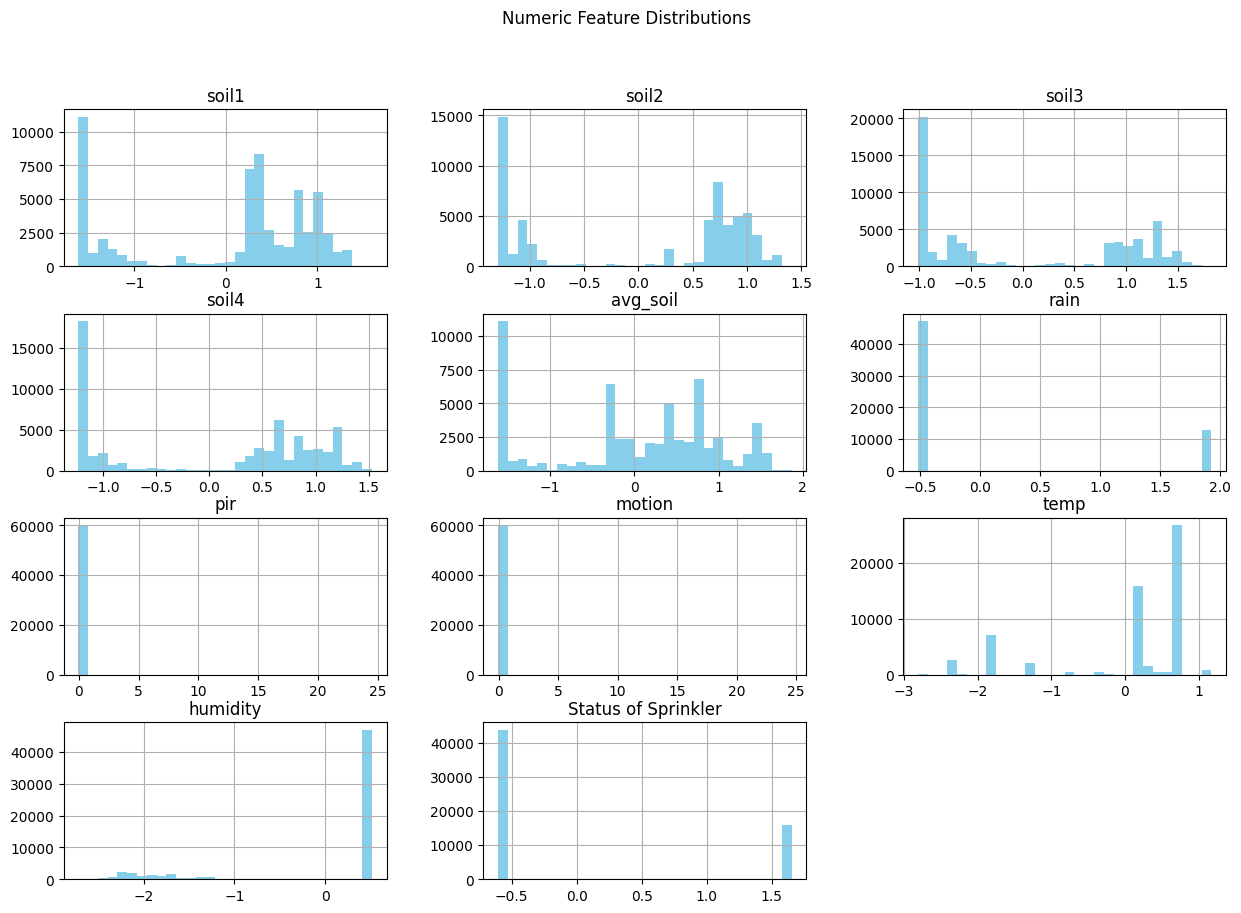

In [ ]:
# 5. Numeric Feature Distributions
numeric_cols = scaled_data.select_dtypes(include=[np.number]).columns.tolist()
scaled_data[numeric_cols].hist(bins=30, figsize=(15,10), color='skyblue')
plt.suptitle("Numeric Feature Distributions")
plt.show()

In [ ]:
# 6. Categorical Feature Distributions
categorical_cols = scaled_data.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=scaled_data, palette="Set3")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

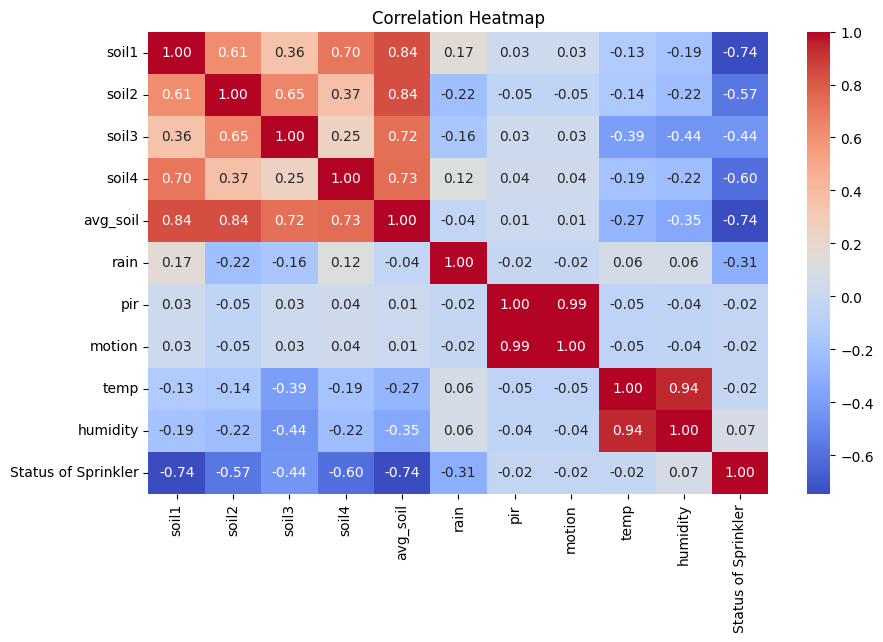

In [ ]:
# 7. Correlation Heatmap (Numerical features only)
plt.figure(figsize=(10,6))
sns.heatmap(scaled_data[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# 8. Pairplot (relationship between features)
if len(numeric_cols) <= 6:  # Avoid too large plots
    sns.pairplot(scaled_data[numeric_cols + ["Status of Sprinkler"]], hue="Status of Sprinkler", diag_kind="kde")
    plt.show()

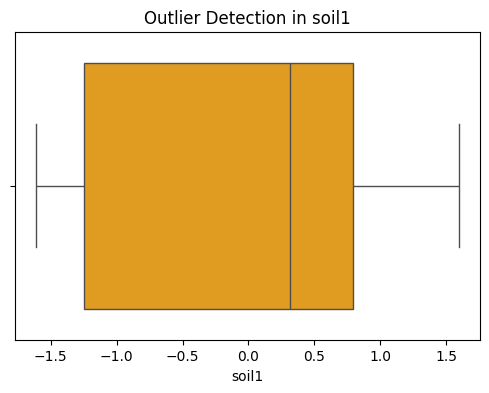

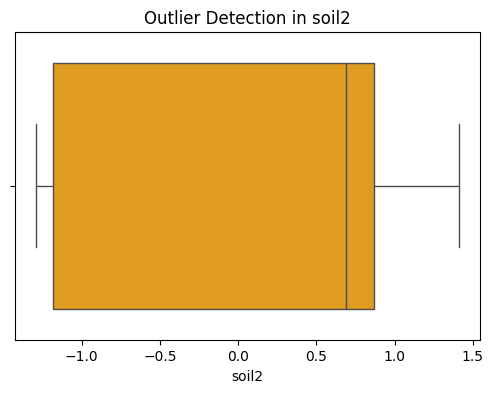

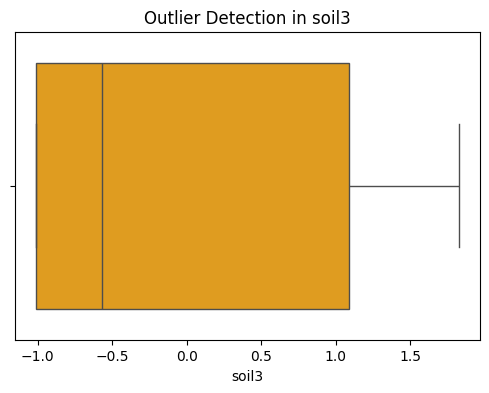

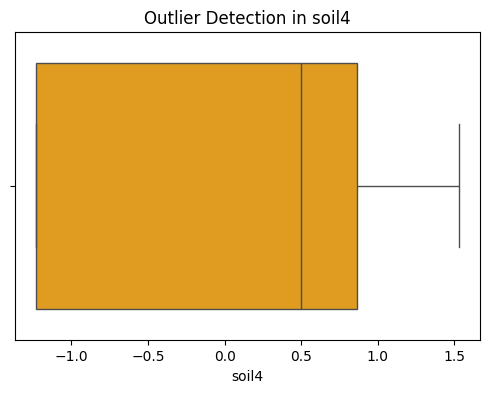

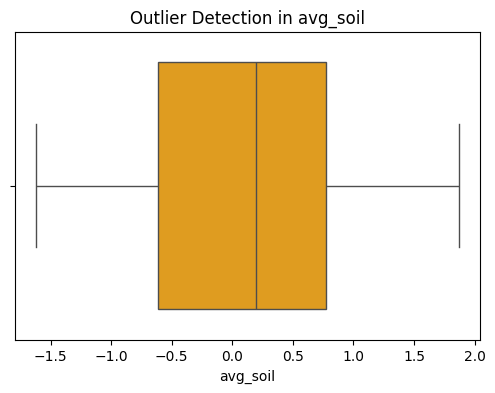

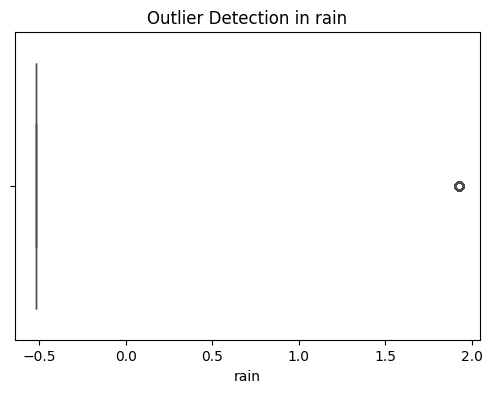

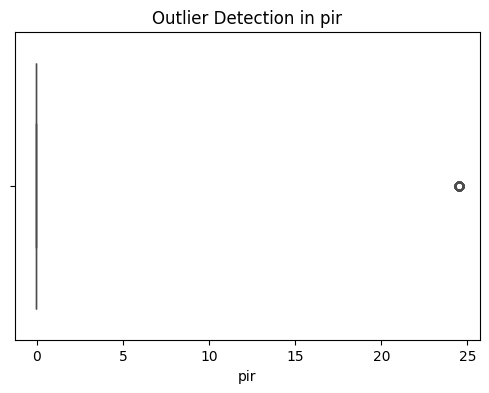

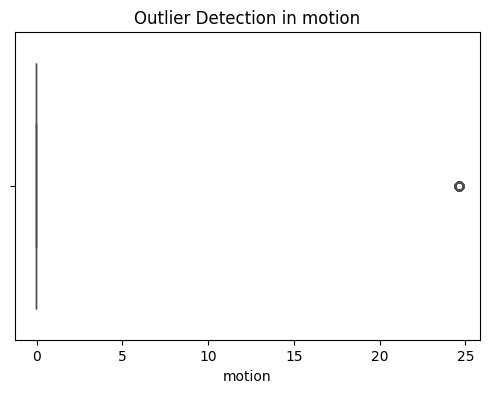

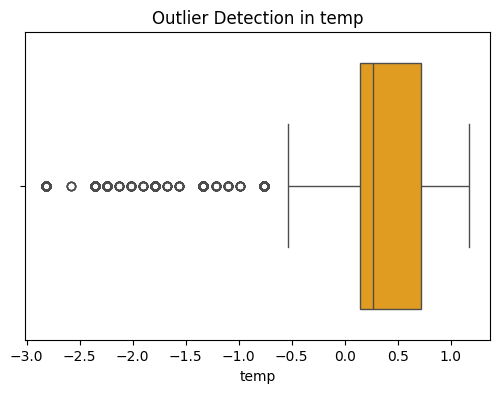

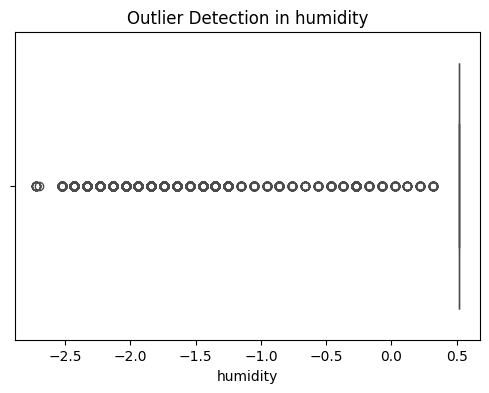

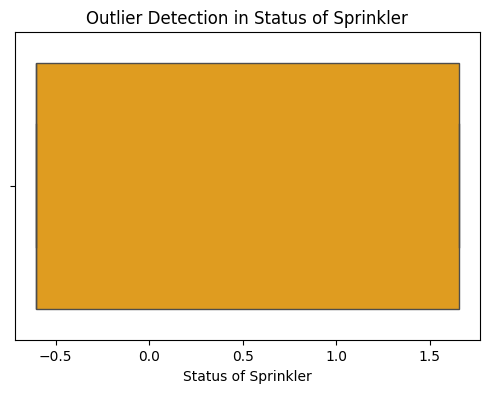

In [ ]:
# 9. Outlier Detection using Boxplots
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=scaled_data[col], color="orange")
    plt.title(f"Outlier Detection in {col}")
    plt.show()

/tmp/ipython-input-530549570.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Status of Sprinkler", y=col, data=scaled_data, palette="Set1")


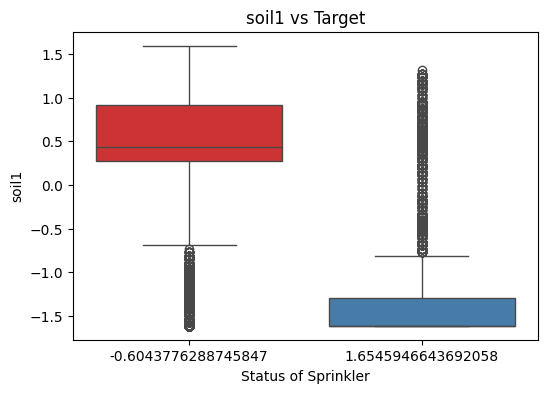

/tmp/ipython-input-530549570.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Status of Sprinkler", y=col, data=scaled_data, palette="Set1")


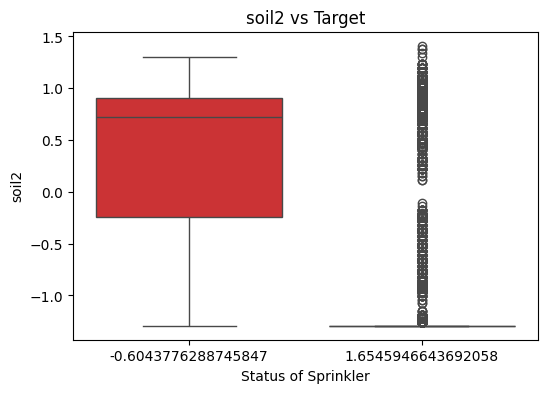

/tmp/ipython-input-530549570.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Status of Sprinkler", y=col, data=scaled_data, palette="Set1")


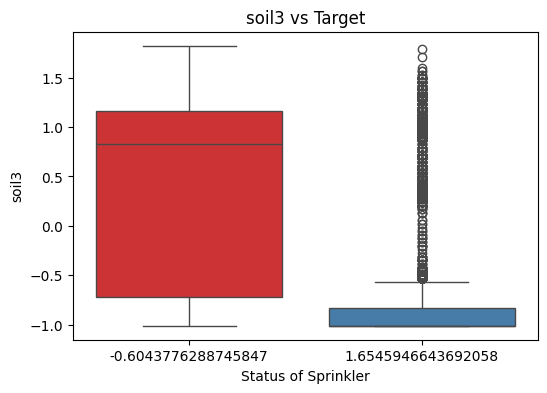

/tmp/ipython-input-530549570.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Status of Sprinkler", y=col, data=scaled_data, palette="Set1")


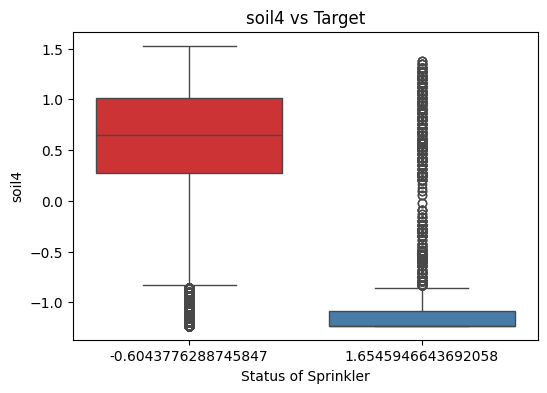

/tmp/ipython-input-530549570.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Status of Sprinkler", y=col, data=scaled_data, palette="Set1")


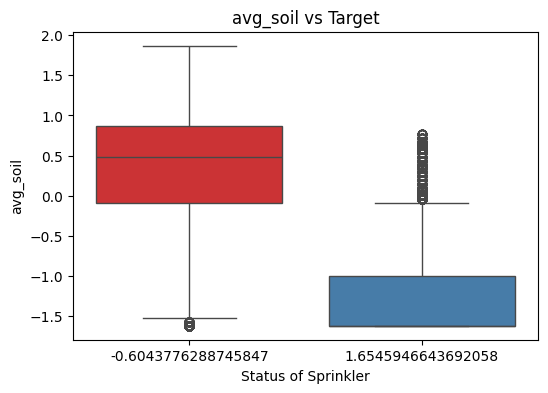

/tmp/ipython-input-530549570.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Status of Sprinkler", y=col, data=scaled_data, palette="Set1")


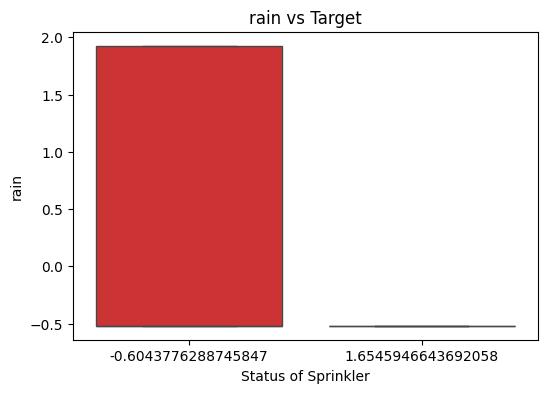

/tmp/ipython-input-530549570.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Status of Sprinkler", y=col, data=scaled_data, palette="Set1")


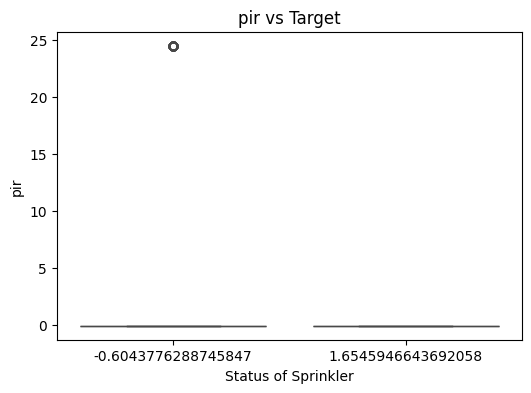

/tmp/ipython-input-530549570.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Status of Sprinkler", y=col, data=scaled_data, palette="Set1")


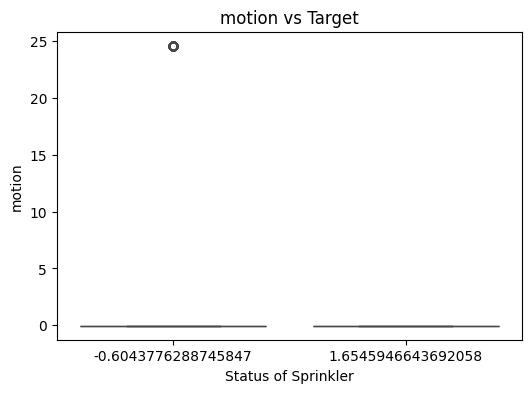

/tmp/ipython-input-530549570.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Status of Sprinkler", y=col, data=scaled_data, palette="Set1")


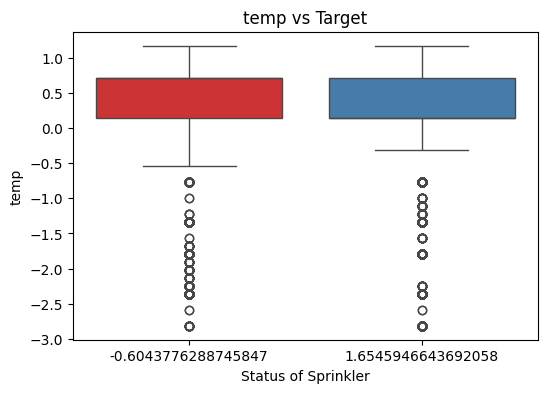

/tmp/ipython-input-530549570.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Status of Sprinkler", y=col, data=scaled_data, palette="Set1")


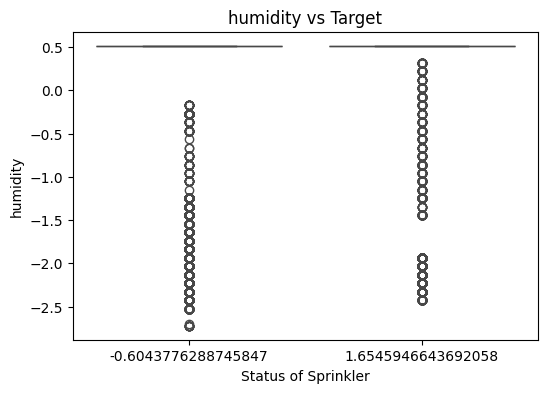

/tmp/ipython-input-530549570.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Status of Sprinkler", y=col, data=scaled_data, palette="Set1")


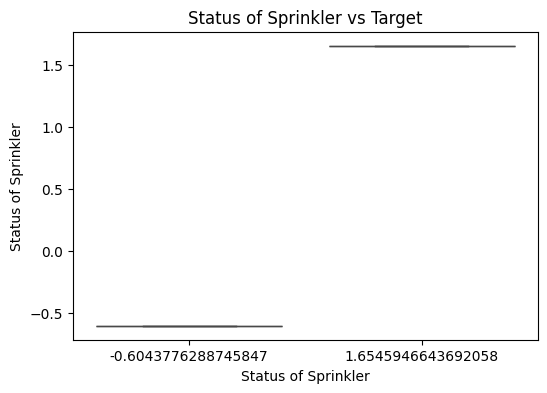

In [ ]:
# 10. Relationship between Features and Target
if "Status of Sprinkler" in scaled_data.columns:
    for col in numeric_cols:
        plt.figure(figsize=(6,4))
        sns.boxplot(x="Status of Sprinkler", y=col, data=scaled_data, palette="Set1")
        plt.title(f"{col} vs Target")
        plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)  # keep top 10 features
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['soil1', 'soil2', 'soil3', 'soil4', 'avg_soil', 'rain', 'pir', 'motion',
       'temp', 'humidity'],
      dtype='object')


In [ ]:
target_col = "Status of Sprinkler"

X = scaled_data.drop(target_col, axis=1)
y = scaled_data[target_col]

In [ ]:
# 2. Train / Test Split
# ========================================
# Split into 80% Train, 20% Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
print("\nTrain Shape:", X_train.shape, y_train.shape)
print("Test Shape:", X_test.shape, y_test.shape)


Train Shape: (48069, 10) (48069,)
Test Shape: (12018, 10) (12018,)


In [ ]:
# 3. Train / Validation / Test Split
# ========================================
# First split into Train + Temp (80% / 20%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# Then split Temp into Validation + Test (50% / 50% of 20%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

In [ ]:
print("\nTrain Shape:", X_train.shape, y_train.shape)
print("Validation Shape:", X_val.shape, y_val.shape)
print("Test Shape:", X_test.shape, y_test.shape)


Train Shape: (48069, 10) (48069,)
Validation Shape: (6009, 10) (6009,)
Test Shape: (6009, 10) (6009,)



📊 Model Performance:
Mean Absolute Error (MAE): 0.370
Mean Squared Error (MSE): 0.271
Root Mean Squared Error (RMSE): 0.520
R² Score: 0.729

Cross-Validation R² Scores: [ 4.71162572e-01  6.43320870e-01  3.07893824e-01 -9.69702412e+30
  9.17557865e-01]
Average CV R²: -1.9394048249154092e+30


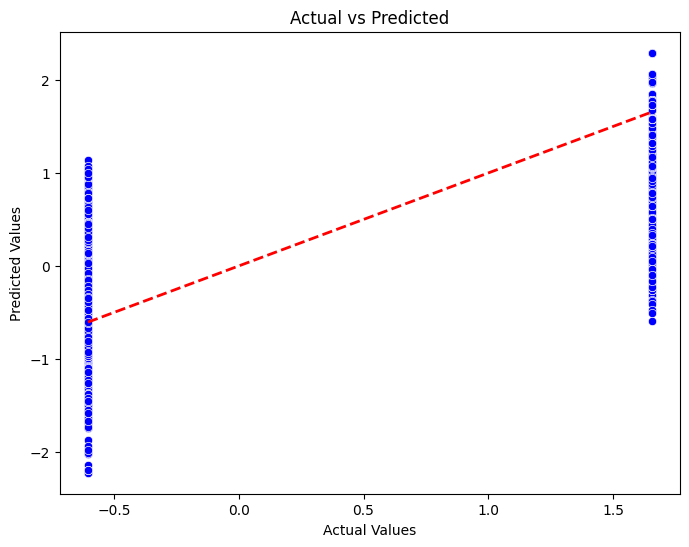

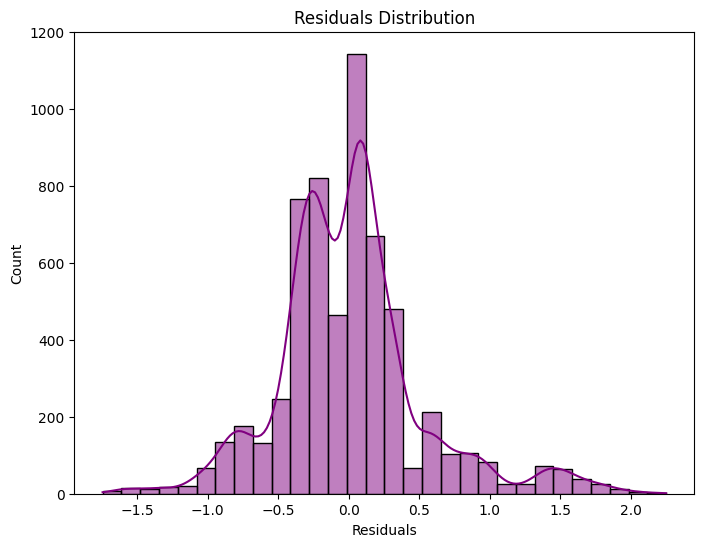

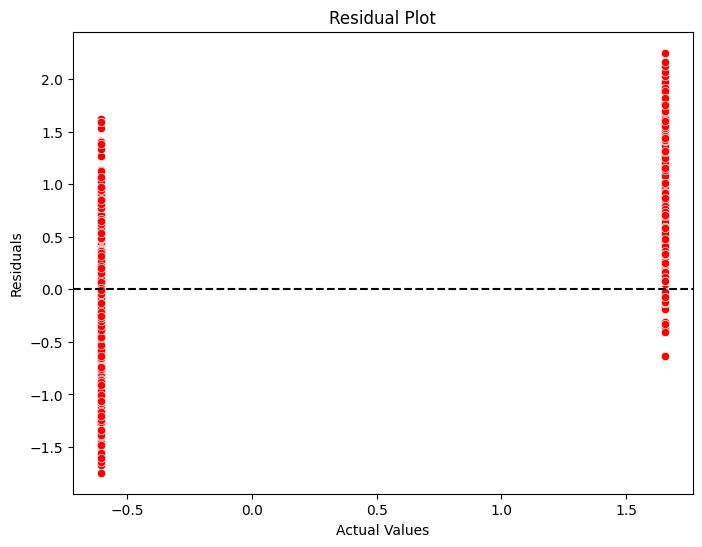


🔹 Feature Coefficients:
          Coefficient
soil1       -1.465666
soil2       -1.429163
soil3       -1.483388
soil4       -1.446431
avg_soil     3.781728
rain        -0.294366
pir          0.003587
motion      -0.027482
temp        -0.447060
humidity     0.247279


In [ ]:
# ===============================
# LINEAR REGRESSION COMPLETE CODE
# ===============================

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# ===============================
# 4. Model Evaluation (Error Metrics)
# ===============================
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n📊 Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

# ===============================
# 5. Cross-Validation
# ===============================
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("\nCross-Validation R² Scores:", cv_scores)
print("Average CV R²:", cv_scores.mean())

# ===============================
# 6. Plot: Actual vs Predicted
# ===============================
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()

# ===============================
# 7. Plot: Residuals
# ===============================
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde=True, color="purple")
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.show()

# ===============================
# 8. Error Visualization
# ===============================
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=residuals, color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# ===============================
# 9. Feature Importance
# ===============================
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\n🔹 Feature Coefficients:")
print(coefficients)

# ===============================
# END OF CODE
# ===============================


Training Set Shape: (48069, 10) (48069,)
Testing Set Shape: (12018, 10) (12018,)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

         OFF       0.95      0.99      0.97      8803
          ON       0.97      0.86      0.91      3215

    accuracy                           0.95     12018
   macro avg       0.96      0.92      0.94     12018
weighted avg       0.96      0.95      0.95     12018



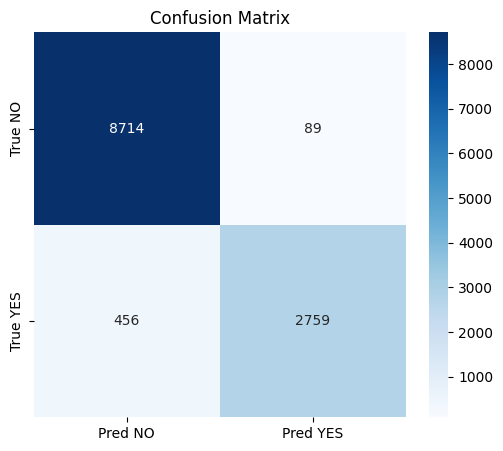

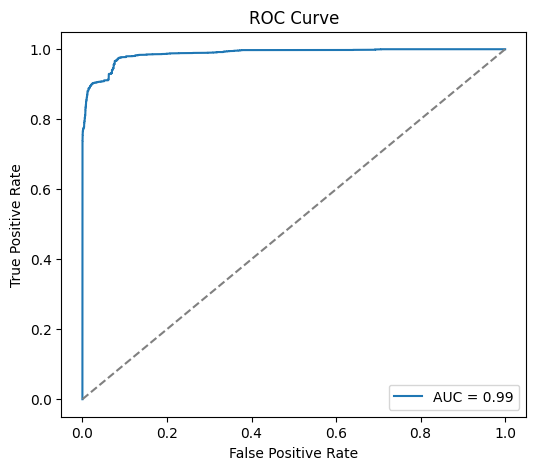

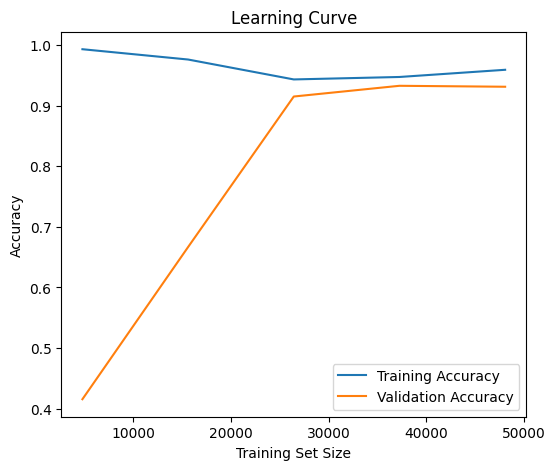

Model Accuracy: 0.95


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
# ------------------------------
# 2. Encode Target (YES=1, NO=0)
# ------------------------------
le = LabelEncoder()
data['Status of Sprinkler'] = le.fit_transform(data['Status of Sprinkler'])  # YES=1, NO=0

# ------------------------------
# 3. Split Dataset
# ------------------------------
target_col = "Status of Sprinkler"

X = data.drop(target_col, axis=1)
y = data[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTraining Set Shape:", X_train.shape, y_train.shape)
print("Testing Set Shape:", X_test.shape, y_test.shape)

# ------------------------------
# 4. Train Logistic Regression Model
# ------------------------------
model = LogisticRegression()
model.fit(X_train, y_train)

# ------------------------------
# 5. Make Predictions
# ------------------------------
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# ------------------------------
# 6. Classification Report
# ------------------------------
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['OFF', 'ON']))

# ------------------------------
# 7. Confusion Matrix
# ------------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred NO', 'Pred YES'],
            yticklabels=['True NO', 'True YES'])
plt.title('Confusion Matrix')
plt.show()

# ------------------------------
# 8. ROC Curve
# ------------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# ------------------------------
# 9. Learning Curve (Validation Graph)
# ------------------------------
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='accuracy', n_jobs=-1
)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(6, 5))
plt.plot(train_sizes, train_mean, label='Training Accuracy')
plt.plot(train_sizes, test_mean, label='Validation Accuracy')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.show()

# ------------------------------
# 10. Accuracy Score
# ------------------------------
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Training Set Shape: (48069, 10) (48069,)
Testing Set Shape: (12018, 10) (12018,)
🔹 Classification Report:

              precision    recall  f1-score   support

         OFF       0.95      1.00      0.97      8803
          ON       0.99      0.85      0.91      3215

    accuracy                           0.96     12018
   macro avg       0.97      0.92      0.94     12018
weighted avg       0.96      0.96      0.96     12018



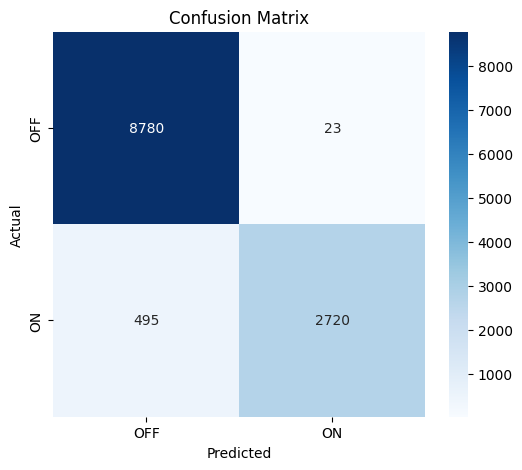

✅ Accuracy: 0.96
✅ Precision: 0.99
✅ Recall: 0.85
✅ F1 Score: 0.91


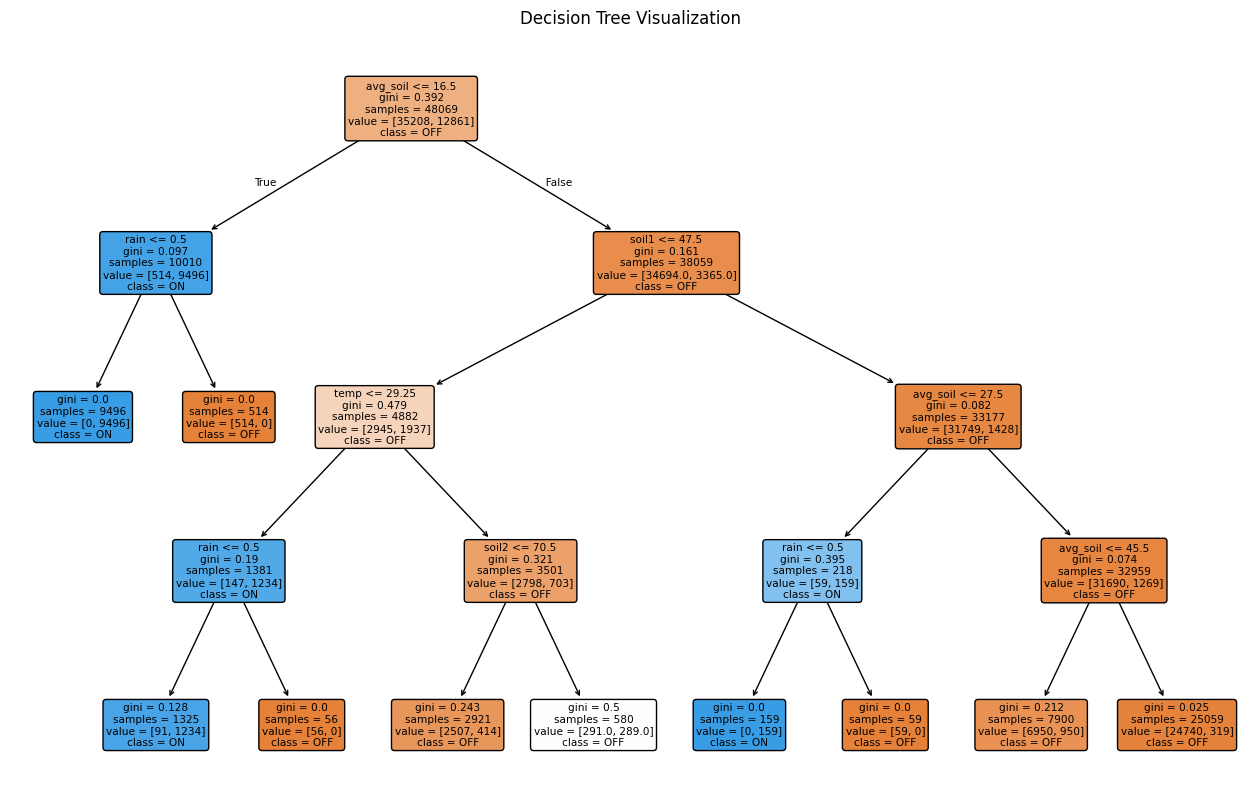

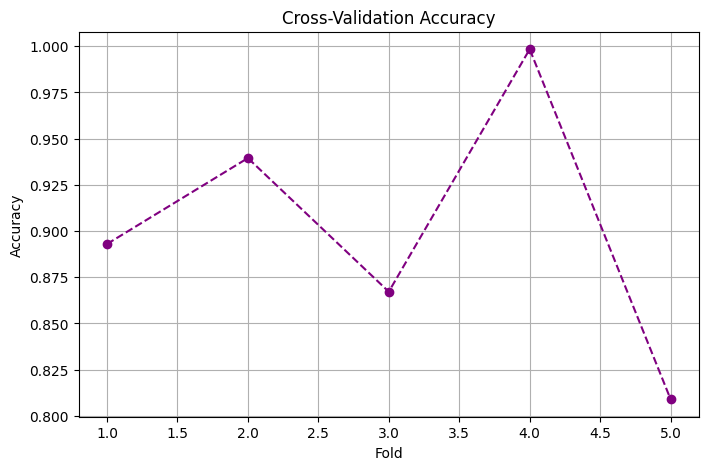

Cross-validation scores: [0.89299384 0.93950741 0.86718815 0.99841891 0.80902055]
Mean CV Accuracy: 0.90


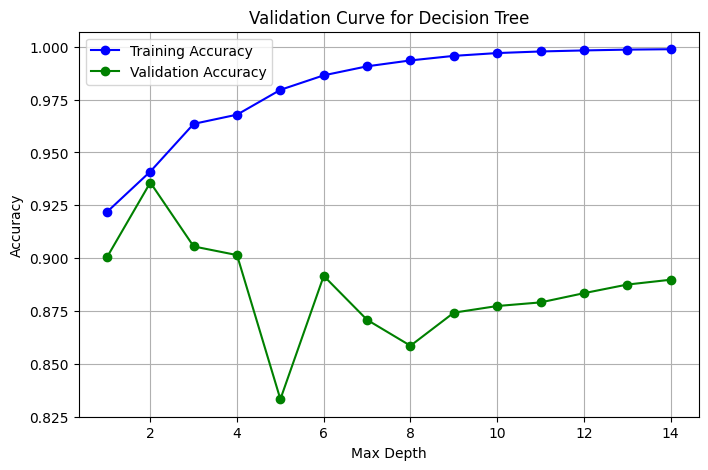

In [ ]:
# 📌 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, validation_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

le = LabelEncoder()
data['Status of Sprinkler'] = le.fit_transform(data['Status of Sprinkler'])  # YES=1, NO=0

# ------------------------------
# 3. Split Dataset
# ------------------------------
target_col = "Status of Sprinkler"

X = data.drop(target_col, axis=1)
y = data[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTraining Set Shape:", X_train.shape, y_train.shape)
print("Testing Set Shape:", X_test.shape, y_test.shape)

# 📌 Build Decision Tree model
model = DecisionTreeClassifier(random_state=42, max_depth=4)  # adjust max_depth if needed
model.fit(X_train, y_train)

# 📌 Make predictions
y_pred = model.predict(X_test)

# ==============================
# 🔹 MODEL RESULTS
# ==============================

# 📌 Classification Report
print("🔹 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['OFF', 'ON']))

# 📌 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['OFF', 'ON'], yticklabels=['OFF', 'ON'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 📌 Accuracy, Precision, Recall, F1
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"✅ Accuracy: {acc:.2f}")
print(f"✅ Precision: {prec:.2f}")
print(f"✅ Recall: {rec:.2f}")
print(f"✅ F1 Score: {f1:.2f}")

# 📌 Plot Decision Tree
plt.figure(figsize=(16, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['OFF', 'ON'], rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

# ==============================
# 🔹 CROSS-VALIDATION
# ==============================
cv_scores = cross_val_score(model, X, y, cv=5)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='--', color='purple')
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("Cross-Validation Accuracy")
plt.grid()
plt.show()
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.2f}")

# ==============================
# 🔹 VALIDATION CURVE
# ==============================
param_range = range(1, 15)
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(random_state=42),
    X, y, param_name="max_depth", param_range=param_range,
    scoring="accuracy", cv=5
)

# Calculate mean and std
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(param_range, train_mean, label="Training Accuracy", color="blue", marker='o')
plt.plot(param_range, test_mean, label="Validation Accuracy", color="green", marker='o')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Validation Curve for Decision Tree")
plt.legend()
plt.grid()
plt.show()


Training Set Shape: (48069, 10) (48069,)
Testing Set Shape: (12018, 10) (12018,)
🔹 Classification Report:

              precision    recall  f1-score   support

         OFF       0.98      1.00      0.99      8803
          ON       0.99      0.95      0.97      3215

    accuracy                           0.98     12018
   macro avg       0.99      0.97      0.98     12018
weighted avg       0.98      0.98      0.98     12018



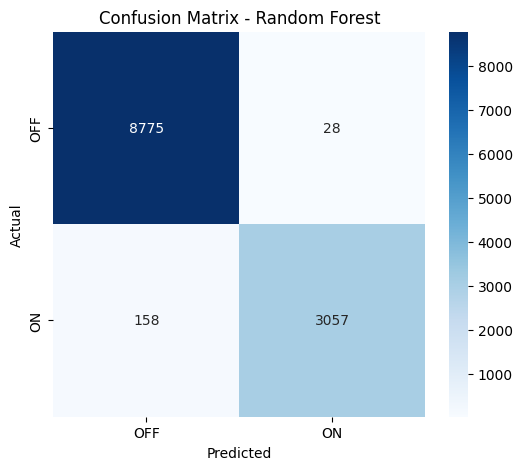

✅ Accuracy: 0.98
✅ Precision: 0.99
✅ Recall: 0.95
✅ F1 Score: 0.97


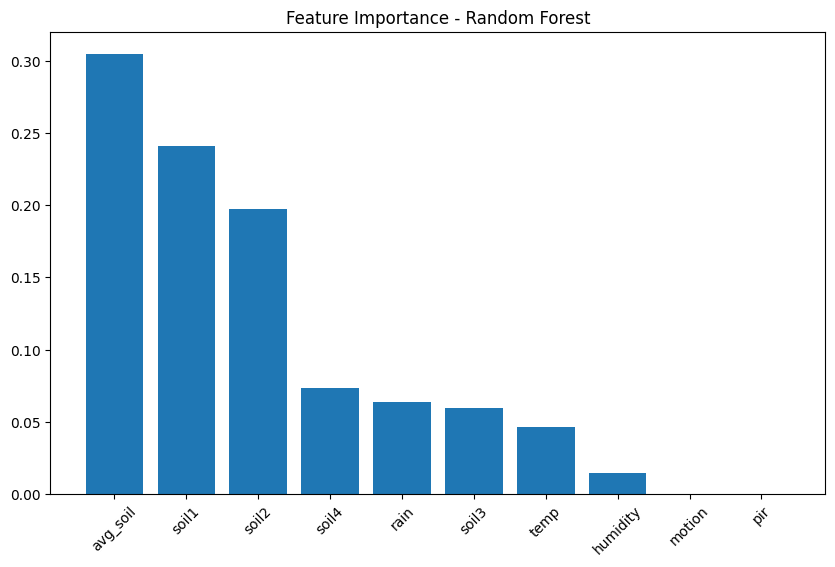

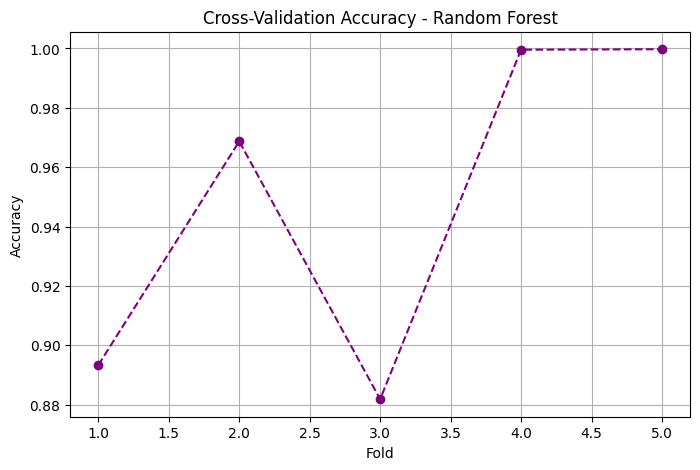

Cross-validation scores: [0.89332668 0.9687136  0.88183407 0.99958392 0.99975035]
Mean CV Accuracy: 0.95


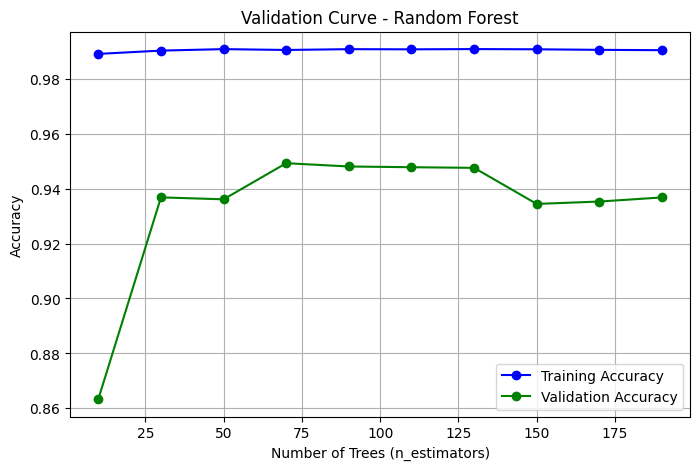

In [ ]:
# 📌 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, validation_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

# ------------------------------
# 1. Encode Target Column (YES/NO → 1/0)
# ------------------------------
le = LabelEncoder()
data['Status of Sprinkler'] = le.fit_transform(data['Status of Sprinkler'])  # YES=1, NO=0

# ------------------------------
# 2. Split Dataset
# ------------------------------
target_col = "Status of Sprinkler"
X = data.drop(target_col, axis=1)
y = data[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTraining Set Shape:", X_train.shape, y_train.shape)
print("Testing Set Shape:", X_test.shape, y_test.shape)

# ------------------------------
# 3. Build Random Forest Model
# ------------------------------
model = RandomForestClassifier(
    n_estimators=100,     # number of trees
    max_depth=6,          # limit depth to avoid overfitting
    random_state=42
)
model.fit(X_train, y_train)

# ------------------------------
# 4. Make Predictions
# ------------------------------
y_pred = model.predict(X_test)

# ==============================
# 🔹 MODEL RESULTS
# ==============================

# 📌 Classification Report
print("🔹 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['OFF', 'ON']))

# 📌 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['OFF', 'ON'], yticklabels=['OFF', 'ON'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# 📌 Accuracy, Precision, Recall, F1
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"✅ Accuracy: {acc:.2f}")
print(f"✅ Precision: {prec:.2f}")
print(f"✅ Recall: {rec:.2f}")
print(f"✅ F1 Score: {f1:.2f}")

# 📌 Feature Importance Plot
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)
plt.title("Feature Importance - Random Forest")
plt.show()

# ==============================
# 🔹 CROSS-VALIDATION
# ==============================
cv_scores = cross_val_score(model, X, y, cv=5)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='--', color='purple')
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("Cross-Validation Accuracy - Random Forest")
plt.grid()
plt.show()
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.2f}")

# ==============================
# 🔹 VALIDATION CURVE
# ==============================
param_range = range(10, 201, 20)  # number of trees
train_scores, test_scores = validation_curve(
    RandomForestClassifier(random_state=42, max_depth=6),
    X, y, param_name="n_estimators", param_range=param_range,
    scoring="accuracy", cv=5
)

# Calculate mean
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(param_range, train_mean, label="Training Accuracy", color="blue", marker='o')
plt.plot(param_range, test_mean, label="Validation Accuracy", color="green", marker='o')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Validation Curve - Random Forest")
plt.legend()
plt.grid()
plt.show()


Training Set Shape: (48069, 10) (48069,)
Testing Set Shape: (12018, 10) (12018,)
🔹 Classification Report:

              precision    recall  f1-score   support

         OFF       0.98      0.99      0.99      8803
          ON       0.98      0.95      0.96      3215

    accuracy                           0.98     12018
   macro avg       0.98      0.97      0.97     12018
weighted avg       0.98      0.98      0.98     12018



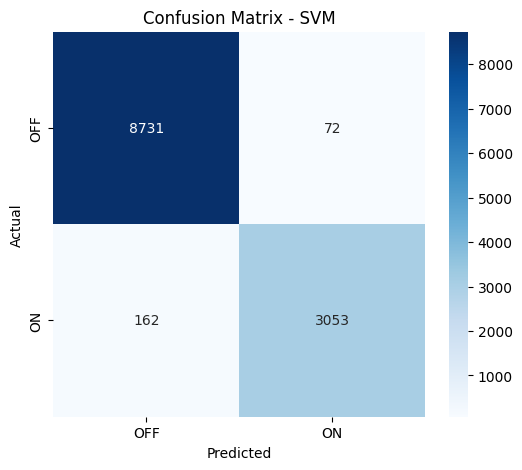

✅ Accuracy: 0.98
✅ Precision: 0.98
✅ Recall: 0.95
✅ F1 Score: 0.96


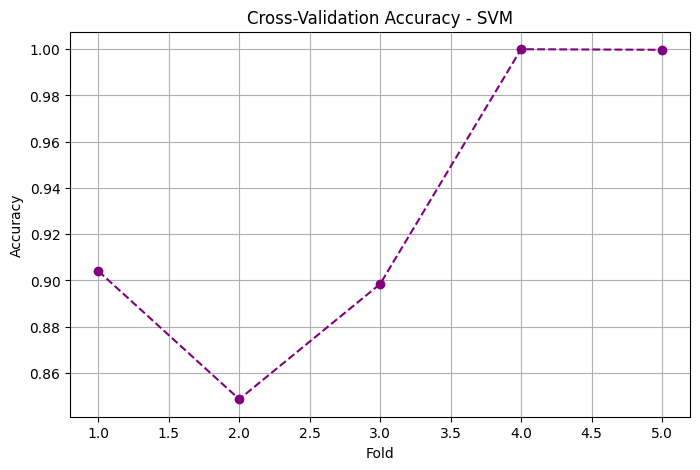

Cross-validation scores: [0.90406058 0.8486437  0.89847716 1.         0.99975035]
Mean CV Accuracy: 0.93


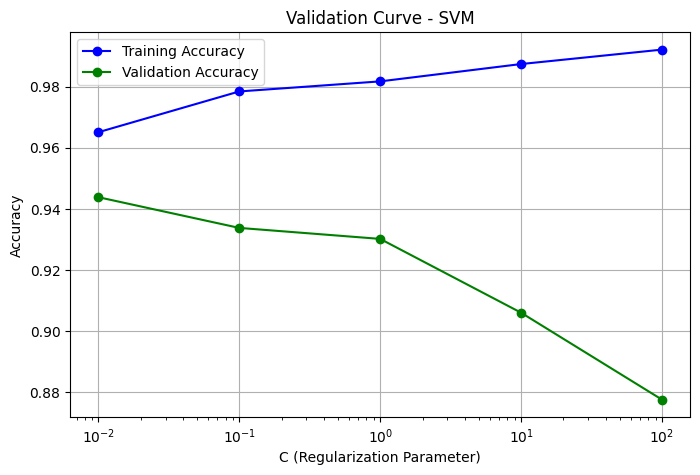

In [ ]:
# 📌 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, validation_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

# ------------------------------
# 1. Encode Target Column (YES/NO → 1/0)
# ------------------------------
le = LabelEncoder()
data['Status of Sprinkler'] = le.fit_transform(data['Status of Sprinkler'])  # YES=1, NO=0

# ------------------------------
# 2. Split Dataset
# ------------------------------
target_col = "Status of Sprinkler"
X = data.drop(target_col, axis=1)
y = data[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTraining Set Shape:", X_train.shape, y_train.shape)
print("Testing Set Shape:", X_test.shape, y_test.shape)

# ------------------------------
# 3. Feature Scaling (important for SVM!)
# ------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------------
# 4. Build SVM Model
# ------------------------------
model = SVC(kernel="rbf", C=1.0, gamma="scale", probability=True, random_state=42)
model.fit(X_train_scaled, y_train)

# ------------------------------
# 5. Make Predictions
# ------------------------------
y_pred = model.predict(X_test_scaled)

# ==============================
# 🔹 MODEL RESULTS
# ==============================

# 📌 Classification Report
print("🔹 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['OFF', 'ON']))

# 📌 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['OFF', 'ON'], yticklabels=['OFF', 'ON'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()

# 📌 Accuracy, Precision, Recall, F1
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"✅ Accuracy: {acc:.2f}")
print(f"✅ Precision: {prec:.2f}")
print(f"✅ Recall: {rec:.2f}")
print(f"✅ F1 Score: {f1:.2f}")

# ==============================
# 🔹 CROSS-VALIDATION
# ==============================
cv_scores = cross_val_score(model, scaler.fit_transform(X), y, cv=5)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='--', color='purple')
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("Cross-Validation Accuracy - SVM")
plt.grid()
plt.show()
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.2f}")

# ==============================
# 🔹 VALIDATION CURVE
# ==============================
param_range = [0.01, 0.1, 1, 10, 100]
train_scores, test_scores = validation_curve(
    SVC(kernel="rbf", gamma="scale"),
    scaler.fit_transform(X), y,
    param_name="C",
    param_range=param_range,
    scoring="accuracy",
    cv=5
)

# Calculate mean
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(param_range, train_mean, label="Training Accuracy", color="blue", marker='o')
plt.plot(param_range, test_mean, label="Validation Accuracy", color="green", marker='o')
plt.xscale("log")  # because C is exponential
plt.xlabel("C (Regularization Parameter)")
plt.ylabel("Accuracy")
plt.title("Validation Curve - SVM")
plt.legend()
plt.grid()
plt.show()


Training Set Shape: (48069, 10) (48069,)
Testing Set Shape: (12018, 10) (12018,)
🔹 Classification Report:

              precision    recall  f1-score   support

         OFF       0.97      0.99      0.98      8803
          ON       0.97      0.93      0.95      3215

    accuracy                           0.97     12018
   macro avg       0.97      0.96      0.97     12018
weighted avg       0.97      0.97      0.97     12018



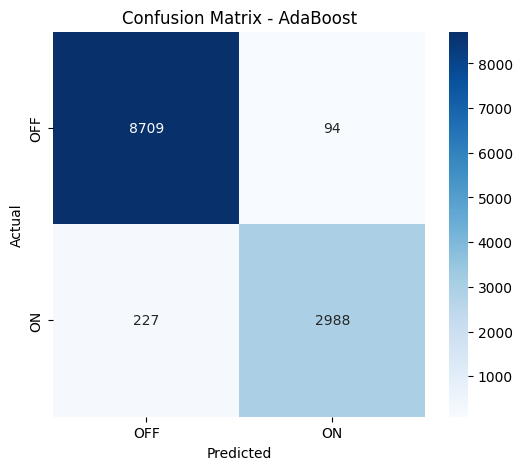

✅ Accuracy: 0.97
✅ Precision: 0.97
✅ Recall: 0.93
✅ F1 Score: 0.95


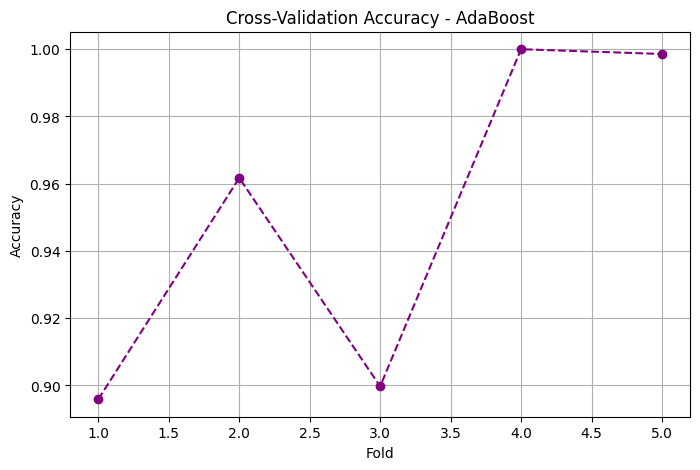

Cross-validation scores: [0.89590614 0.96172408 0.89972539 1.         0.99858534]
Mean CV Accuracy: 0.95


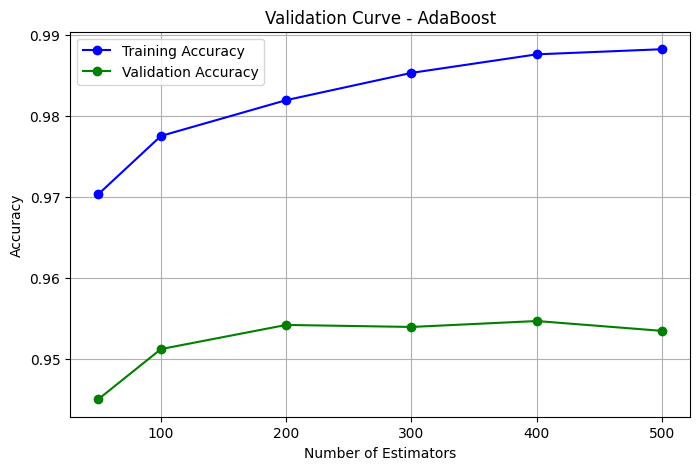

In [ ]:
# 📌 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, validation_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

# ------------------------------
# 1. Encode Target Column (YES/NO → 1/0)
# ------------------------------
le = LabelEncoder()
data['Status of Sprinkler'] = le.fit_transform(data['Status of Sprinkler'])  # YES=1, NO=0

# ------------------------------
# 2. Split Dataset
# ------------------------------
target_col = "Status of Sprinkler"
X = data.drop(target_col, axis=1)
y = data[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTraining Set Shape:", X_train.shape, y_train.shape)
print("Testing Set Shape:", X_test.shape, y_test.shape)

# ------------------------------
# 3. Build AdaBoost Model
# ------------------------------
model = AdaBoostClassifier(
    n_estimators=100,   # number of weak learners
    learning_rate=1.0,  # step size
    random_state=42
)
model.fit(X_train, y_train)

# ------------------------------
# 4. Make Predictions
# ------------------------------
y_pred = model.predict(X_test)

# ==============================
# 🔹 MODEL RESULTS
# ==============================

# 📌 Classification Report
print("🔹 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['OFF', 'ON']))

# 📌 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['OFF', 'ON'], yticklabels=['OFF', 'ON'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - AdaBoost")
plt.show()

# 📌 Accuracy, Precision, Recall, F1
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"✅ Accuracy: {acc:.2f}")
print(f"✅ Precision: {prec:.2f}")
print(f"✅ Recall: {rec:.2f}")
print(f"✅ F1 Score: {f1:.2f}")

# ==============================
# 🔹 CROSS-VALIDATION
# ==============================
cv_scores = cross_val_score(model, X, y, cv=5)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='--', color='purple')
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("Cross-Validation Accuracy - AdaBoost")
plt.grid()
plt.show()
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.2f}")

# ==============================
# 🔹 VALIDATION CURVE
# ==============================
param_range = [50, 100, 200, 300, 400, 500]  # number of estimators
train_scores, test_scores = validation_curve(
    AdaBoostClassifier(learning_rate=1.0, random_state=42),
    X, y,
    param_name="n_estimators",
    param_range=param_range,
    scoring="accuracy",
    cv=5
)

# Calculate mean
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(param_range, train_mean, label="Training Accuracy", color="blue", marker='o')
plt.plot(param_range, test_mean, label="Validation Accuracy", color="green", marker='o')
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("Validation Curve - AdaBoost")
plt.legend()
plt.grid()
plt.show()


Training Set Shape: (48069, 10) (48069,)
Testing Set Shape: (12018, 10) (12018,)
🔹 Classification Report:

              precision    recall  f1-score   support

         OFF       0.95      0.98      0.97      8803
          ON       0.95      0.85      0.90      3215

    accuracy                           0.95     12018
   macro avg       0.95      0.92      0.93     12018
weighted avg       0.95      0.95      0.95     12018



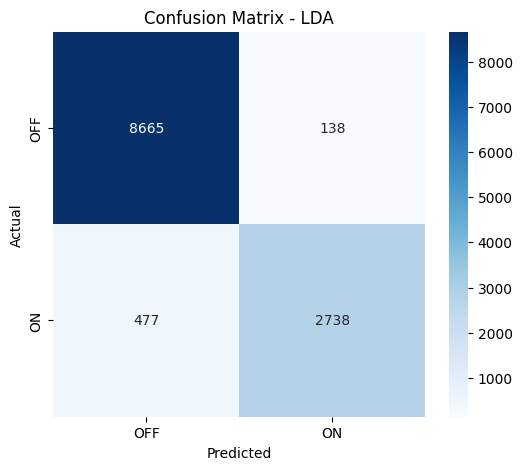

✅ Accuracy: 0.95
✅ Precision: 0.95
✅ Recall: 0.85
✅ F1 Score: 0.90


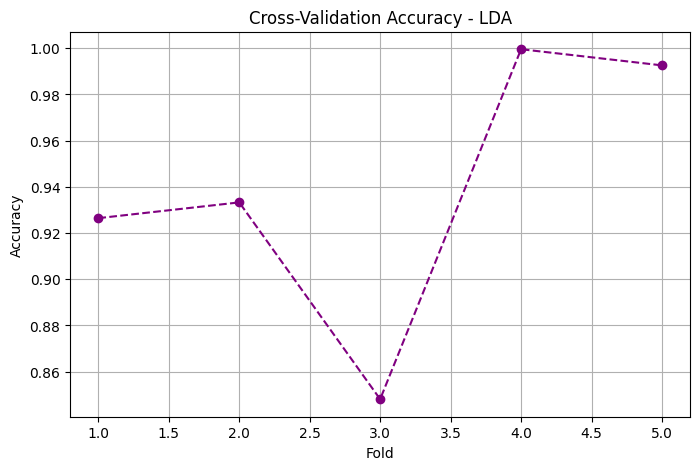

Cross-validation scores: [0.92644367 0.93326677 0.8480486  0.99958392 0.99259383]
Mean CV Accuracy: 0.94


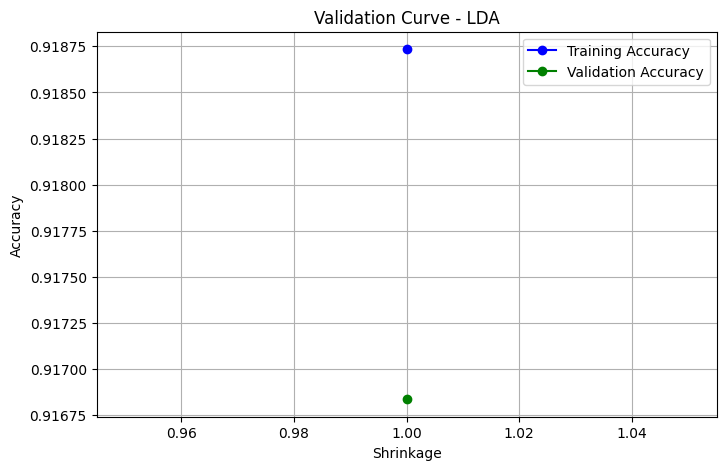

In [ ]:
# 📌 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, validation_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

# ------------------------------
# 1. Encode Target Column (YES/NO → 1/0)
# ------------------------------
le = LabelEncoder()
data['Status of Sprinkler'] = le.fit_transform(data['Status of Sprinkler'])  # YES=1, NO=0

# ------------------------------
# 2. Split Dataset
# ------------------------------
target_col = "Status of Sprinkler"
X = data.drop(target_col, axis=1)
y = data[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTraining Set Shape:", X_train.shape, y_train.shape)
print("Testing Set Shape:", X_test.shape, y_test.shape)

# ------------------------------
# 3. Feature Scaling (helps LDA performance)
# ------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------------
# 4. Build LDA Model
# ------------------------------
model = LinearDiscriminantAnalysis()
model.fit(X_train_scaled, y_train)

# ------------------------------
# 5. Make Predictions
# ------------------------------
y_pred = model.predict(X_test_scaled)

# ==============================
# 🔹 MODEL RESULTS
# ==============================

# 📌 Classification Report
print("🔹 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['OFF', 'ON']))

# 📌 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['OFF', 'ON'], yticklabels=['OFF', 'ON'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LDA")
plt.show()

# 📌 Accuracy, Precision, Recall, F1
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"✅ Accuracy: {acc:.2f}")
print(f"✅ Precision: {prec:.2f}")
print(f"✅ Recall: {rec:.2f}")
print(f"✅ F1 Score: {f1:.2f}")

# ==============================
# 🔹 CROSS-VALIDATION
# ==============================
cv_scores = cross_val_score(model, scaler.fit_transform(X), y, cv=5)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='--', color='purple')
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("Cross-Validation Accuracy - LDA")
plt.grid()
plt.show()
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.2f}")

# ==============================
# 🔹 VALIDATION CURVE
# ==============================
param_range = [1, 2, 3]  # shrinkage options for LDA solver='lsqr' or 'eigen'
train_scores, test_scores = validation_curve(
    LinearDiscriminantAnalysis(solver='lsqr'),
    scaler.fit_transform(X), y,
    param_name="shrinkage",
    param_range=param_range,
    scoring="accuracy",
    cv=5
)

# Calculate mean
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(param_range, train_mean, label="Training Accuracy", color="blue", marker='o')
plt.plot(param_range, test_mean, label="Validation Accuracy", color="green", marker='o')
plt.xlabel("Shrinkage")
plt.ylabel("Accuracy")
plt.title("Validation Curve - LDA")
plt.legend()
plt.grid()
plt.show()


Training Set Shape: (48069, 10) (48069,)
Testing Set Shape: (12018, 10) (12018,)
🔹 Classification Report:

              precision    recall  f1-score   support

         OFF       0.73      1.00      0.85      8803
          ON       0.00      0.00      0.00      3215

    accuracy                           0.73     12018
   macro avg       0.37      0.50      0.42     12018
weighted avg       0.54      0.73      0.62     12018



/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is il

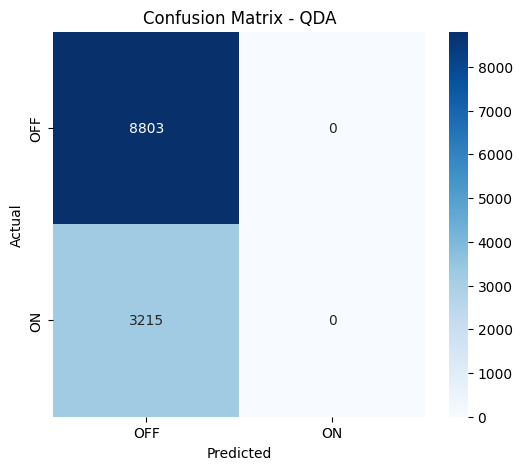

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


✅ Accuracy: 0.73
✅ Precision: 0.00
✅ Recall: 0.00
✅ F1 Score: 0.00


/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


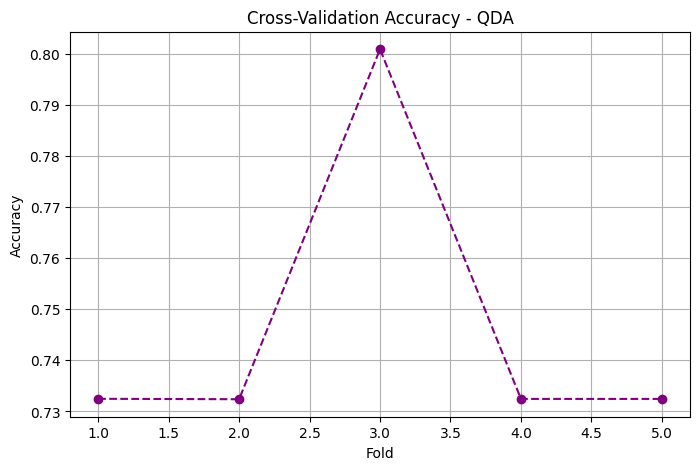

Cross-validation scores: [0.73248461 0.7324014  0.80086544 0.73246235 0.73246235]
Mean CV Accuracy: 0.75


In [ ]:
# 📌 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

# ------------------------------
# 1. Encode Target Column (YES/NO → 1/0)
# ------------------------------
le = LabelEncoder()
data['Status of Sprinkler'] = le.fit_transform(data['Status of Sprinkler'])  # YES=1, NO=0

# ------------------------------
# 2. Split Dataset
# ------------------------------
target_col = "Status of Sprinkler"
X = data.drop(target_col, axis=1)
y = data[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTraining Set Shape:", X_train.shape, y_train.shape)
print("Testing Set Shape:", X_test.shape, y_test.shape)

# ------------------------------
# 3. Feature Scaling (important for QDA stability)
# ------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------------
# 4. Build QDA Model
# ------------------------------
model = QuadraticDiscriminantAnalysis()
model.fit(X_train_scaled, y_train)

# ------------------------------
# 5. Make Predictions
# ------------------------------
y_pred = model.predict(X_test_scaled)

# ==============================
# 🔹 MODEL RESULTS
# ==============================

# 📌 Classification Report
print("🔹 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['OFF', 'ON']))

# 📌 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['OFF', 'ON'], yticklabels=['OFF', 'ON'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - QDA")
plt.show()

# 📌 Accuracy, Precision, Recall, F1
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"✅ Accuracy: {acc:.2f}")
print(f"✅ Precision: {prec:.2f}")
print(f"✅ Recall: {rec:.2f}")
print(f"✅ F1 Score: {f1:.2f}")

# ==============================
# 🔹 CROSS-VALIDATION
# ==============================
cv_scores = cross_val_score(model, scaler.fit_transform(X), y, cv=5)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='--', color='purple')
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("Cross-Validation Accuracy - QDA")
plt.grid()
plt.show()
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.2f}")

Train shape: (48069, 10) (48069,)
Test shape: (12018, 10) (12018,)
[0]	train-logloss:0.54930	eval-logloss:0.54937


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[1]	train-logloss:0.52353	eval-logloss:0.52370
[2]	train-logloss:0.50234	eval-logloss:0.50259
[3]	train-logloss:0.48482	eval-logloss:0.48513
[4]	train-logloss:0.47026	eval-logloss:0.47063
[5]	train-logloss:0.45810	eval-logloss:0.45852
[6]	train-logloss:0.44788	eval-logloss:0.44835
[7]	train-logloss:0.43927	eval-logloss:0.43977
[8]	train-logloss:0.43197	eval-logloss:0.43250
[9]	train-logloss:0.42577	eval-logloss:0.42633
[10]	train-logloss:0.42048	eval-logloss:0.42106
[11]	train-logloss:0.41595	eval-logloss:0.41655
[12]	train-logloss:0.41207	eval-logloss:0.41269
[13]	train-logloss:0.40873	eval-logloss:0.40936
[14]	train-logloss:0.40585	eval-logloss:0.40650
[15]	train-logloss:0.40336	eval-logloss:0.40402
[16]	train-logloss:0.40121	eval-logloss:0.40188
[17]	train-logloss:0.39935	eval-logloss:0.40002
[18]	train-logloss:0.39773	eval-logloss:0.39841
[19]	train-logloss:0.39632	eval-logloss:0.39701
[20]	train-logloss:0.39510	eval-logloss:0.39579
[21]	train-logloss:0.39403	eval-logloss:0.39473
[

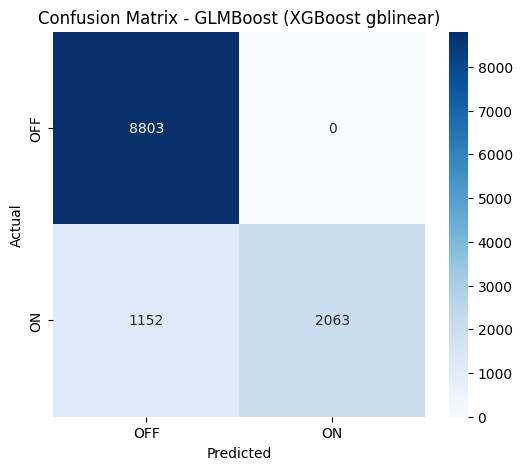

Accuracy: 0.90
Precision: 1.00
Recall: 0.64
F1 Score: 0.78


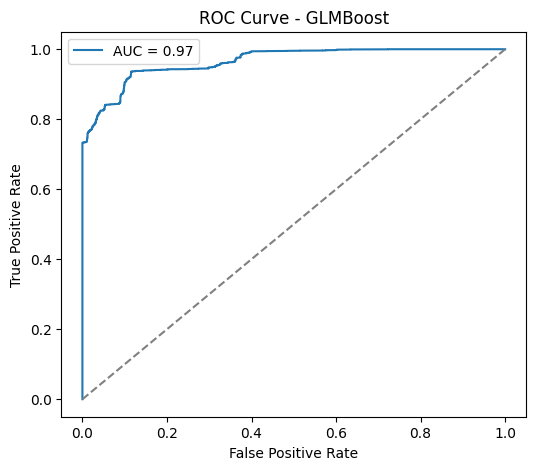

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:43:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:43:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:43:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:43:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:43:54] WARNING: /w

Cross-validation accuracies: [0.79048095 0.94366783 0.8027794  0.90014147 0.99941749]
Mean CV accuracy: 0.8872974261666501


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:43:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:43:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:43:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:43:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:43:57] WARNING: /w

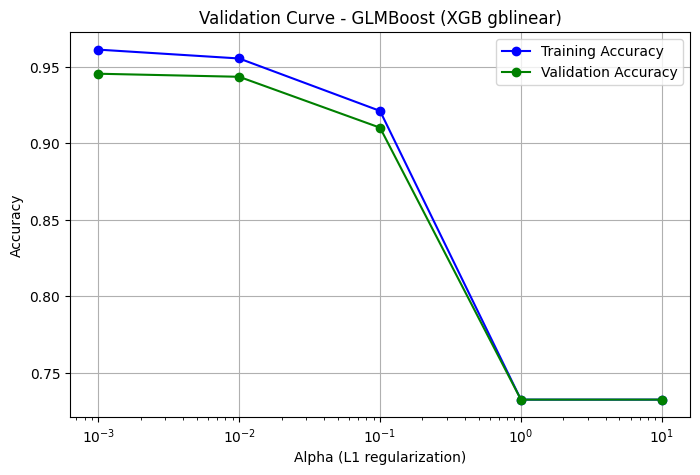

In [ ]:
# Install xgboost if not already: pip install xgboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, validation_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score
)
import xgboost as xgb

# ------------------------------
# 1. Encode target (YES/NO → 1/0)
# ------------------------------
le = LabelEncoder()
data['Status of Sprinkler'] = le.fit_transform(data['Status of Sprinkler'])  # YES=1, NO=0

# ------------------------------
# 2. Split features & target
# ------------------------------
target_col = "Status of Sprinkler"
X = data.drop(columns=[target_col])
y = data[target_col]

# If many features, scale numeric ones
numeric_cols = X.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

# ------------------------------
# 3. Build XGBoost with gblinear booster
# ------------------------------
# Create DMatrix for xgboost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'booster': 'gblinear',
    'objective': 'binary:logistic',
    'alpha': 0.01,         # L1 regularization on weights
    'lambda': 1.0,         # L2 regularization on weights
    'learning_rate': 0.1,
    'eval_metric': 'logloss',
    'verbosity': 1,
    'random_state': 42
}

# Train
evallist = [(dtrain, 'train'), (dtest, 'eval')]
num_round = 50
bst = xgb.train(params, dtrain, num_round, evallist, early_stopping_rounds=10)

# ------------------------------
# 4. Predictions
# ------------------------------
y_pred_prob = bst.predict(dtest)
y_pred = (y_pred_prob > 0.5).astype(int)

# ------------------------------
# 5. Evaluation: classification report
# ------------------------------
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['OFF','ON']))

# ------------------------------
# 6. Confusion Matrix
# ------------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['OFF','ON'], yticklabels=['OFF','ON'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - GLMBoost (XGBoost gblinear)")
plt.show()

# ------------------------------
# 7. Accuracy, Precision, Recall, F1
# ------------------------------
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1 Score: {f1:.2f}")

# ------------------------------
# 8. ROC Curve & AUC
# ------------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - GLMBoost")
plt.legend()
plt.show()

# ------------------------------
# 9. Cross-Validation
# ------------------------------
# We can use sklearn wrapper
from xgboost import XGBClassifier

clf = xgb.XGBClassifier(
    booster='gblinear',
    objective='binary:logistic',
    alpha=0.01,
    reg_lambda=1.0,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print("Cross-validation accuracies:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# ------------------------------
# 10. Validation Curve on regularization parameter (alpha or lambda)
# ------------------------------
param_range = [0.001, 0.01, 0.1, 1, 10]
train_scores, test_scores = validation_curve(
    XGBClassifier(
        booster='gblinear',
        objective='binary:logistic',
        learning_rate=0.1,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    ),
    X, y,
    param_name='alpha',       # L1 regularization parameter
    param_range=param_range,
    scoring='accuracy',
    cv=5
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8,5))
plt.plot(param_range, train_mean, label='Training Accuracy', marker='o', color='blue')
plt.plot(param_range, test_mean, label='Validation Accuracy', marker='o', color='green')
plt.xscale('log')
plt.xlabel('Alpha (L1 regularization)')
plt.ylabel('Accuracy')
plt.title('Validation Curve - GLMBoost (XGB gblinear)')
plt.legend()
plt.grid()
plt.show()

Train shape: (48069, 10) (48069,)
Test shape: (12018, 10) (12018,)
Classification Report:
               precision    recall  f1-score   support

         OFF       1.00      0.30      0.46      8803
          ON       0.34      1.00      0.51      3215

    accuracy                           0.48     12018
   macro avg       0.67      0.65      0.48     12018
weighted avg       0.82      0.48      0.47     12018



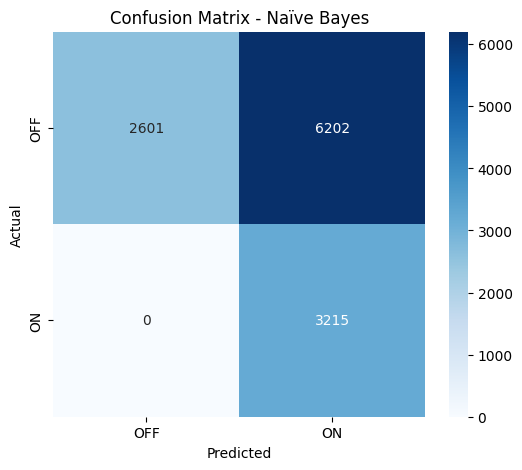

✅ Accuracy: 0.48
✅ Precision: 0.34
✅ Recall: 1.00
✅ F1 Score: 0.51


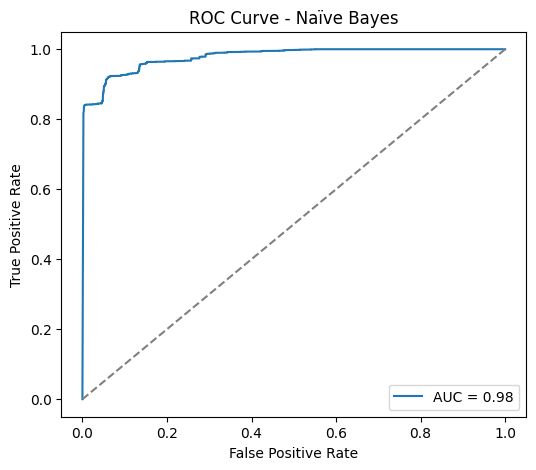

Cross-validation accuracies: [0.81319687 0.45007489 0.43288674 0.35349921 0.77215611]
Mean CV accuracy: 0.5643627648870929


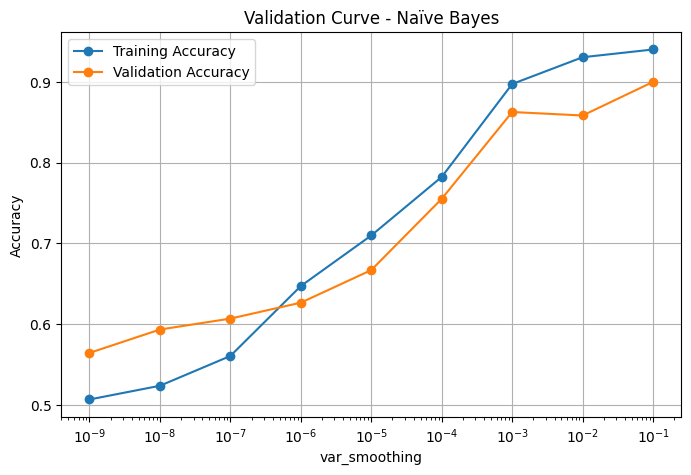

In [ ]:
# ==========================================
# 📌 Model 1: Naïve Bayes (GaussianNB)
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, validation_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score
)

# ------------------------------
# Encode target (YES/NO → 1/0)
# ------------------------------
le = LabelEncoder()
data['Status of Sprinkler'] = le.fit_transform(data['Status of Sprinkler'])  # YES=1, NO=0

# ------------------------------
# Split features & target
# ------------------------------
target_col = "Status of Sprinkler"
X = data.drop(columns=[target_col])
y = data[target_col]

# Scale features (important for GaussianNB)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

# ------------------------------
# Build Gaussian Naïve Bayes model
# ------------------------------
model = GaussianNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:,1]

# ------------------------------
# Evaluation: Classification Report
# ------------------------------
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['OFF','ON']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['OFF','ON'], yticklabels=['OFF','ON'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naïve Bayes")
plt.show()

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"✅ Accuracy: {acc:.2f}")
print(f"✅ Precision: {prec:.2f}")
print(f"✅ Recall: {rec:.2f}")
print(f"✅ F1 Score: {f1:.2f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Naïve Bayes")
plt.legend()
plt.show()

# ------------------------------
# Cross-validation
# ------------------------------
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print("Cross-validation accuracies:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# ------------------------------
# Validation Curve (var_smoothing parameter is key in NB)
# ------------------------------
param_range = np.logspace(-9, -1, 9)
train_scores, test_scores = validation_curve(
    GaussianNB(),
    X_scaled, y,
    param_name="var_smoothing",
    param_range=param_range,
    scoring="accuracy",
    cv=5
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8,5))
plt.semilogx(param_range, train_mean, label="Training Accuracy", marker='o')
plt.semilogx(param_range, test_mean, label="Validation Accuracy", marker='o')
plt.xlabel("var_smoothing")
plt.ylabel("Accuracy")
plt.title("Validation Curve - Naïve Bayes")
plt.legend()
plt.grid()
plt.show()

Train shape: (48069, 10) (48069,)
Test shape: (12018, 10) (12018,)
Classification Report:
               precision    recall  f1-score   support

         OFF       1.00      1.00      1.00      8803
          ON       1.00      0.99      1.00      3215

    accuracy                           1.00     12018
   macro avg       1.00      1.00      1.00     12018
weighted avg       1.00      1.00      1.00     12018



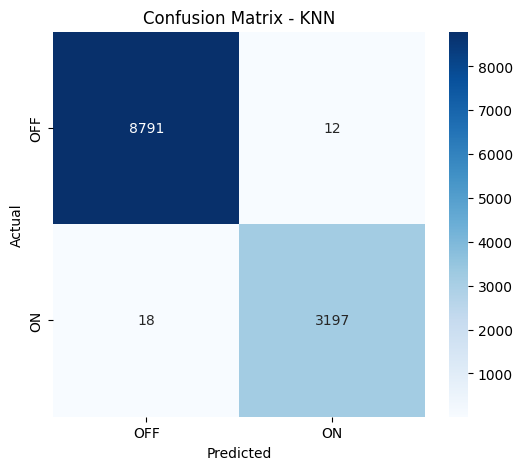

✅ Accuracy: 1.00
✅ Precision: 1.00
✅ Recall: 0.99
✅ F1 Score: 1.00


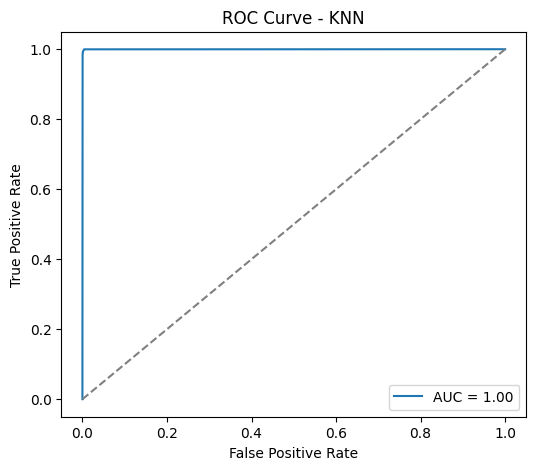

Cross-validation accuracies: [0.91246464 0.84689632 0.9013897  0.78239161 0.99975035]
Mean CV accuracy: 0.8885785244077796


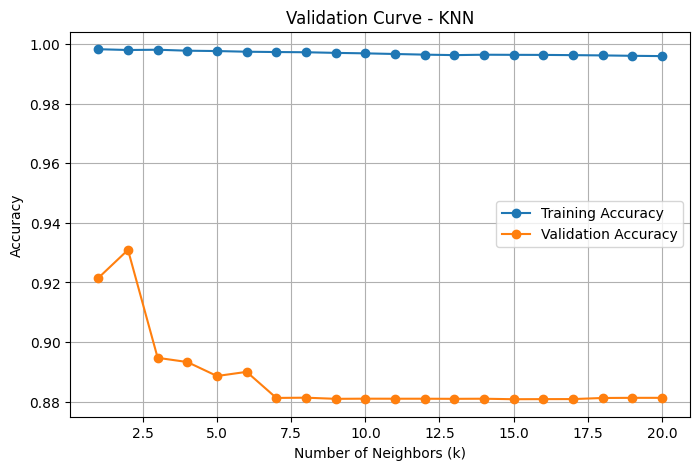

In [ ]:
# ==========================================
# 📌 Model 2: K-Nearest Neighbors (KNN)
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, validation_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score
)

# ------------------------------
# Encode target (YES/NO → 1/0)
# ------------------------------
le = LabelEncoder()
data['Status of Sprinkler'] = le.fit_transform(data['Status of Sprinkler'])  # YES=1, NO=0

# ------------------------------
# Split features & target
# ------------------------------
target_col = "Status of Sprinkler"
X = data.drop(columns=[target_col])
y = data[target_col]

# Scale features (very important for distance-based KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

# ------------------------------
# Build KNN model
# ------------------------------
model = KNeighborsClassifier(n_neighbors=5)  # default = 5
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:,1]

# ------------------------------
# Evaluation: Classification Report
# ------------------------------
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['OFF','ON']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['OFF','ON'], yticklabels=['OFF','ON'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"✅ Accuracy: {acc:.2f}")
print(f"✅ Precision: {prec:.2f}")
print(f"✅ Recall: {rec:.2f}")
print(f"✅ F1 Score: {f1:.2f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN")
plt.legend()
plt.show()

# ------------------------------
# Cross-validation
# ------------------------------
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print("Cross-validation accuracies:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# ------------------------------
# Validation Curve (varying n_neighbors)
# ------------------------------
param_range = range(1, 21)  # 1 to 20 neighbors
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(),
    X_scaled, y,
    param_name="n_neighbors",
    param_range=param_range,
    scoring="accuracy",
    cv=5
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8,5))
plt.plot(param_range, train_mean, label="Training Accuracy", marker='o')
plt.plot(param_range, test_mean, label="Validation Accuracy", marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("Validation Curve - KNN")
plt.legend()
plt.grid()
plt.show()


Train shape: (48069, 10) (48069,)
Test shape: (12018, 10) (12018,)
Classification Report:
               precision    recall  f1-score   support

         OFF       1.00      1.00      1.00      8803
          ON       1.00      0.99      1.00      3215

    accuracy                           1.00     12018
   macro avg       1.00      1.00      1.00     12018
weighted avg       1.00      1.00      1.00     12018



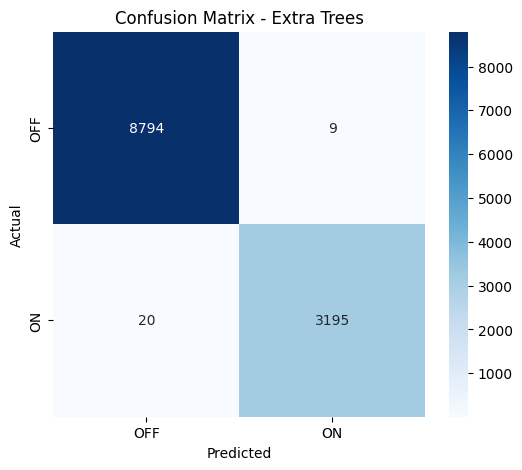

✅ Accuracy: 1.00
✅ Precision: 1.00
✅ Recall: 0.99
✅ F1 Score: 1.00


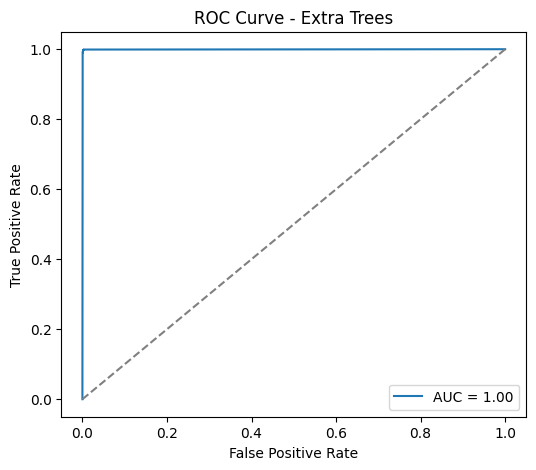

Cross-validation accuracies: [0.91171576 0.96022633 0.89989182 0.99791961 0.99975035]
Mean CV accuracy: 0.9539007748674899


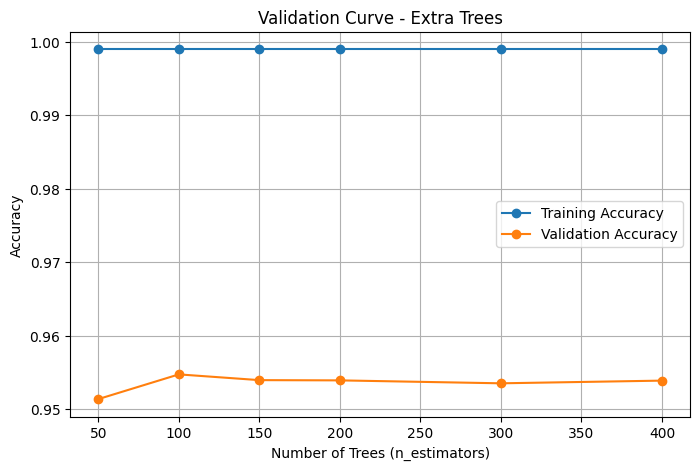

In [ ]:
# ==========================================
# 📌 Model 3: Extra Trees Classifier
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, validation_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score
)

# ------------------------------
# Encode target (YES/NO → 1/0)
# ------------------------------
le = LabelEncoder()
data['Status of Sprinkler'] = le.fit_transform(data['Status of Sprinkler'])  # YES=1, NO=0

# ------------------------------
# Split features & target
# ------------------------------
target_col = "Status of Sprinkler"
X = data.drop(columns=[target_col])
y = data[target_col]

# Scaling (tree-based models don't strictly need scaling, but safe to include)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

# ------------------------------
# Build Extra Trees model
# ------------------------------
model = ExtraTreesClassifier(
    n_estimators=200,      # number of trees
    max_depth=None,        # expand until pure
    random_state=42
)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:,1]

# ------------------------------
# Evaluation: Classification Report
# ------------------------------
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['OFF','ON']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['OFF','ON'], yticklabels=['OFF','ON'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Extra Trees")
plt.show()

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"✅ Accuracy: {acc:.2f}")
print(f"✅ Precision: {prec:.2f}")
print(f"✅ Recall: {rec:.2f}")
print(f"✅ F1 Score: {f1:.2f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Extra Trees")
plt.legend()
plt.show()

# ------------------------------
# Cross-validation
# ------------------------------
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print("Cross-validation accuracies:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# ------------------------------
# Validation Curve (varying n_estimators)
# ------------------------------
param_range = [50, 100, 150, 200, 300, 400]
train_scores, test_scores = validation_curve(
    ExtraTreesClassifier(random_state=42),
    X_scaled, y,
    param_name="n_estimators",
    param_range=param_range,
    scoring="accuracy",
    cv=5
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8,5))
plt.plot(param_range, train_mean, label="Training Accuracy", marker='o')
plt.plot(param_range, test_mean, label="Validation Accuracy", marker='o')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Validation Curve - Extra Trees")
plt.legend()
plt.grid()
plt.show()

Train shape: (48069, 10) (48069,)
Test shape: (12018, 10) (12018,)
Classification Report:
               precision    recall  f1-score   support

         OFF       0.99      1.00      1.00      8803
          ON       0.99      0.98      0.99      3215

    accuracy                           0.99     12018
   macro avg       0.99      0.99      0.99     12018
weighted avg       0.99      0.99      0.99     12018



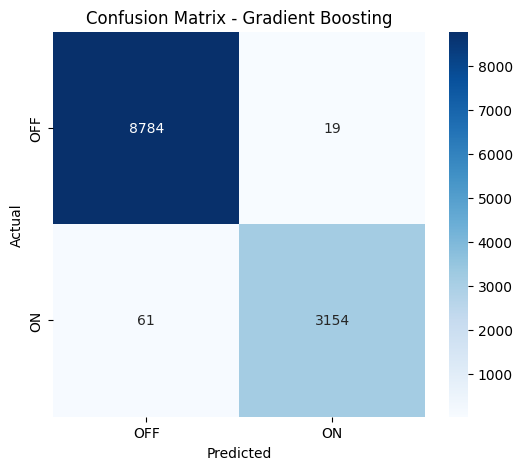

✅ Accuracy: 0.99
✅ Precision: 0.99
✅ Recall: 0.98
✅ F1 Score: 0.99


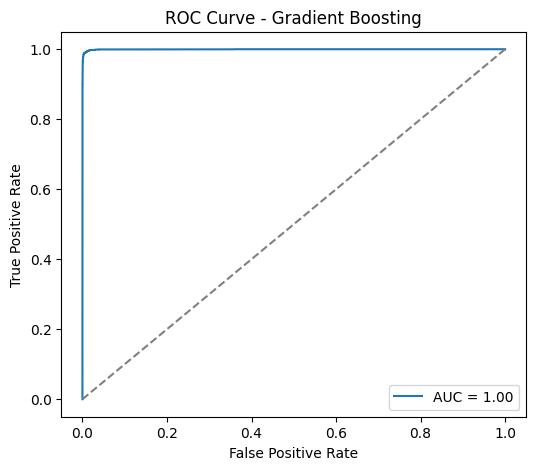

Cross-validation accuracies: [0.9033117  0.9247795  0.89997504 0.89265208 0.99367563]
Mean CV accuracy: 0.9228787868653316


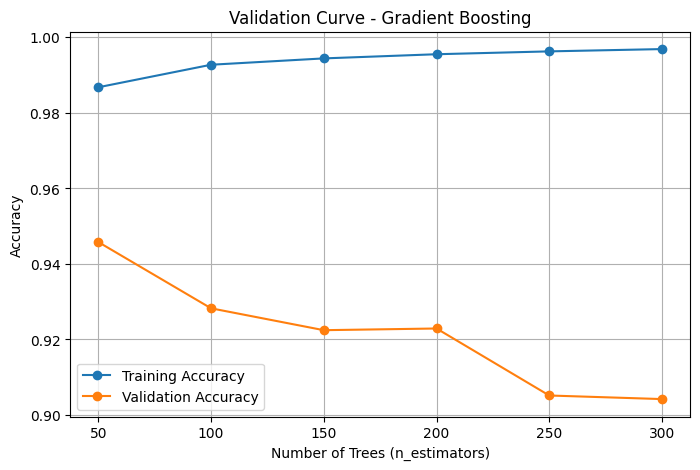

In [ ]:
# ==========================================
# 📌 Model 4: Gradient Boosting Classifier
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, validation_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score
)

# ------------------------------
# Encode target (YES/NO → 1/0)
# ------------------------------
le = LabelEncoder()
data['Status of Sprinkler'] = le.fit_transform(data['Status of Sprinkler'])  # YES=1, NO=0

# ------------------------------
# Split features & target
# ------------------------------
target_col = "Status of Sprinkler"
X = data.drop(columns=[target_col])
y = data[target_col]

# Scaling (optional, tree-based model doesn't need it)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

# ------------------------------
# Build Gradient Boosting Classifier
# ------------------------------
model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:,1]

# ------------------------------
# Evaluation: Classification Report
# ------------------------------
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['OFF','ON']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['OFF','ON'], yticklabels=['OFF','ON'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"✅ Accuracy: {acc:.2f}")
print(f"✅ Precision: {prec:.2f}")
print(f"✅ Recall: {rec:.2f}")
print(f"✅ F1 Score: {f1:.2f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gradient Boosting")
plt.legend()
plt.show()

# ------------------------------
# Cross-validation
# ------------------------------
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print("Cross-validation accuracies:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# ------------------------------
# Validation Curve (varying n_estimators)
# ------------------------------
param_range = [50, 100, 150, 200, 250, 300]
train_scores, test_scores = validation_curve(
    GradientBoostingClassifier(random_state=42),
    X_scaled, y,
    param_name="n_estimators",
    param_range=param_range,
    scoring="accuracy",
    cv=5
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8,5))
plt.plot(param_range, train_mean, label="Training Accuracy", marker='o')
plt.plot(param_range, test_mean, label="Validation Accuracy", marker='o')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Validation Curve - Gradient Boosting")
plt.legend()
plt.grid()
plt.show()

Train shape: (48069, 10) (48069,)
Test shape: (12018, 10) (12018,)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [21:22:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report:
               precision    recall  f1-score   support

         OFF       0.99      1.00      1.00      8803
          ON       0.99      0.98      0.99      3215

    accuracy                           0.99     12018
   macro avg       0.99      0.99      0.99     12018
weighted avg       0.99      0.99      0.99     12018



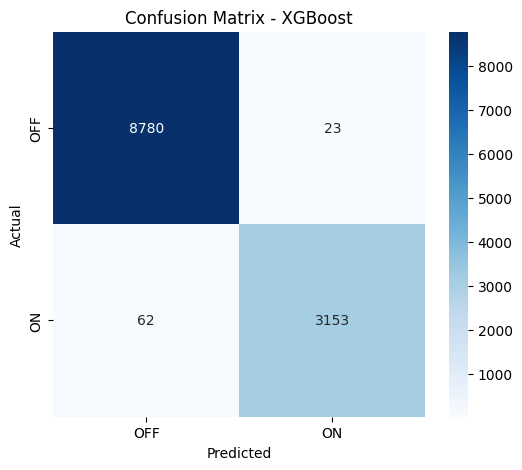

✅ Accuracy: 0.99
✅ Precision: 0.99
✅ Recall: 0.98
✅ F1 Score: 0.99


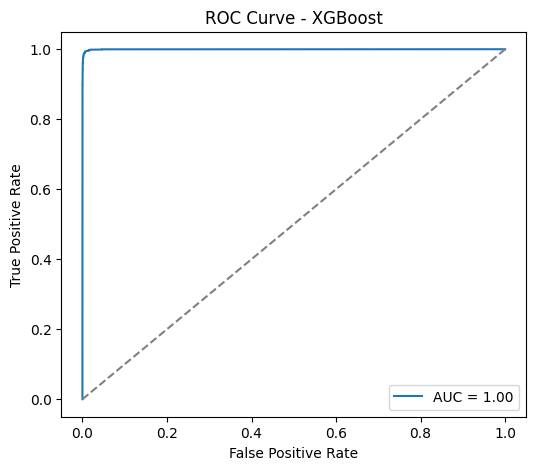

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [21:22:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [21:22:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [21:22:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [21:22:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [21:22:19] WARNING: /w

Cross-validation accuracies: [0.91030121 0.94341821 0.89456603 0.89248565 0.99975035]
Mean CV accuracy: 0.92810429026511


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [21:22:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [21:22:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [21:22:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [21:22:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [21:22:24] WARNING: /w

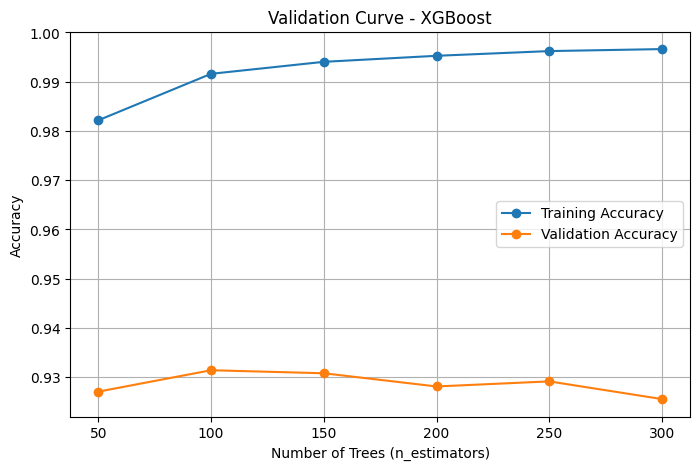

In [ ]:
# ==========================================
# 📌 Model 5: XGBoost Classifier
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, validation_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score
)
import xgboost as xgb
from xgboost import XGBClassifier

# ------------------------------
# Encode target (YES/NO → 1/0)
# ------------------------------
le = LabelEncoder()
data['Status of Sprinkler'] = le.fit_transform(data['Status of Sprinkler'])  # YES=1, NO=0

# ------------------------------
# Split features & target
# ------------------------------
target_col = "Status of Sprinkler"
X = data.drop(columns=[target_col])
y = data[target_col]

# Scale features (optional for XGBoost, but safe)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

# ------------------------------
# Build XGBoost Classifier
# ------------------------------
model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:,1]

# ------------------------------
# Evaluation: Classification Report
# ------------------------------
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['OFF','ON']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['OFF','ON'], yticklabels=['OFF','ON'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"✅ Accuracy: {acc:.2f}")
print(f"✅ Precision: {prec:.2f}")
print(f"✅ Recall: {rec:.2f}")
print(f"✅ F1 Score: {f1:.2f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.show()

# ------------------------------
# Cross-validation
# ------------------------------
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print("Cross-validation accuracies:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# ------------------------------
# Validation Curve (varying n_estimators)
# ------------------------------
param_range = [50, 100, 150, 200, 250, 300]
train_scores, test_scores = validation_curve(
    XGBClassifier(
        learning_rate=0.1,
        max_depth=3,
        objective='binary:logistic',
        eval_metric='logloss',
        use_label_encoder=False,
        random_state=42
    ),
    X_scaled, y,
    param_name="n_estimators",
    param_range=param_range,
    scoring="accuracy",
    cv=5
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8,5))
plt.plot(param_range, train_mean, label="Training Accuracy", marker='o')
plt.plot(param_range, test_mean, label="Validation Accuracy", marker='o')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Validation Curve - XGBoost")
plt.legend()
plt.grid()
plt.show()

Train shape: (48069, 10) (48069,)
Test shape: (12018, 10) (12018,)
[LightGBM] [Info] Number of positive: 12861, number of negative: 35208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003973 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 459
[LightGBM] [Info] Number of data points in the train set: 48069, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267553 -> initscore=-1.007074
[LightGBM] [Info] Start training from score -1.007074
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Classification Report:
               precision    recall  f1-score   support

         OFF       0.99      1.00      1.00      8803
          ON       0.99      0.98      0.99      3215

    accuracy                           0.99     12018
   macro avg       0.99      0.99      0.99     12018
weighted avg       0.99      0.99      0.99     12018



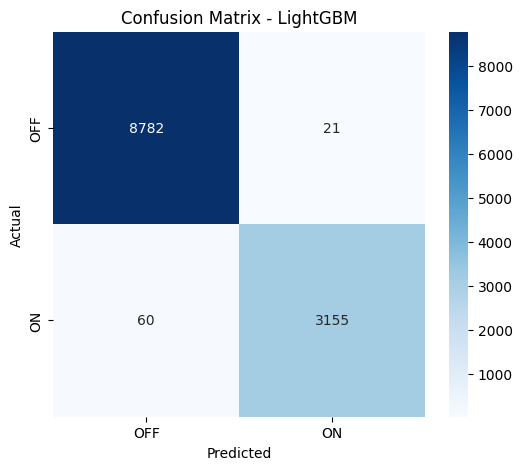

✅ Accuracy: 0.99
✅ Precision: 0.99
✅ Recall: 0.98
✅ F1 Score: 0.99


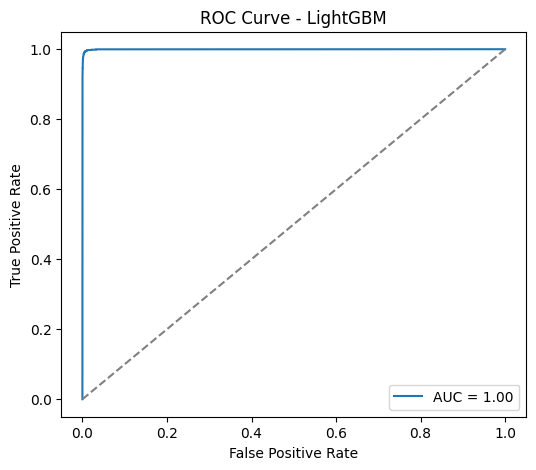

[LightGBM] [Info] Number of positive: 12861, number of negative: 35208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 401
[LightGBM] [Info] Number of data points in the train set: 48069, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267553 -> initscore=-1.007074
[LightGBM] [Info] Start training from score -1.007074
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 12860, number of negative: 35209
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004905 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 48069, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267532 -> initscore=-1.007180
[LightGBM] [Info] Start training from score -1.007180
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 12861, number of negative: 35209
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006254 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 454
[LightGBM] [Info] Number of data points in the train set: 48070, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267547 -> initscore=-1.007102
[LightGBM] [Info] Start training from score -1.007102
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 12861, number of negative: 35209
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004744 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 459
[LightGBM] [Info] Number of data points in the train set: 48070, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267547 -> initscore=-1.007102
[LightGBM] [Info] Start training from score -1.007102
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 12861, number of negative: 35209
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 458
[LightGBM] [Info] Number of data points in the train set: 48070, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267547 -> initscore=-1.007102
[LightGBM] [Info] Start training from score -1.007102
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Cross-validation accuracies: [0.90048261 0.97978033 0.89997504 0.89240243 0.99975035]
Mean CV accuracy: 0.9344781515696277
[LightGBM] [Info] Number of positive: 12861, number of negative: 35208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003116 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 401
[LightGBM] [Info] Number of data points in the train set: 48069, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267553 -> initscore=-1.007074
[LightGBM] [Info] Start training from score -1.007074
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 12861, number of negative: 35208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003092 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 401
[LightGBM] [Info] Number of data points in the train set: 48069, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267553 -> initscore=-1.007074
[LightGBM] [Info] Start training from score -1.007074
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 12861, number of negative: 35208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 401
[LightGBM] [Info] Number of data points in the train set: 48069, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267553 -> initscore=-1.007074
[LightGBM] [Info] Start training from score -1.007074
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 12861, number of negative: 35208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 401
[LightGBM] [Info] Number of data points in the train set: 48069, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267553 -> initscore=-1.007074
[LightGBM] [Info] Start training from score -1.007074
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 12861, number of negative: 35208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 401
[LightGBM] [Info] Number of data points in the train set: 48069, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267553 -> initscore=-1.007074
[LightGBM] [Info] Start training from score -1.007074
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 12861, number of negative: 35208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 401
[LightGBM] [Info] Number of data points in the train set: 48069, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267553 -> initscore=-1.007074
[LightGBM] [Info] Start training from score -1.007074
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 12860, number of negative: 35209
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003248 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 48069, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267532 -> initscore=-1.007180
[LightGBM] [Info] Start training from score -1.007180
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 12860, number of negative: 35209
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 48069, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267532 -> initscore=-1.007180
[LightGBM] [Info] Start training from score -1.007180
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 12860, number of negative: 35209
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004084 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 48069, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267532 -> initscore=-1.007180
[LightGBM] [Info] Start training from score -1.007180
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 12860, number of negative: 35209
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003280 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 48069, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267532 -> initscore=-1.007180
[LightGBM] [Info] Start training from score -1.007180
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 12860, number of negative: 35209
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003254 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 48069, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267532 -> initscore=-1.007180
[LightGBM] [Info] Start training from score -1.007180
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 12860, number of negative: 35209
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003342 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 48069, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267532 -> initscore=-1.007180
[LightGBM] [Info] Start training from score -1.007180
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 12861, number of negative: 35209
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004703 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 454
[LightGBM] [Info] Number of data points in the train set: 48070, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267547 -> initscore=-1.007102
[LightGBM] [Info] Start training from score -1.007102
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 12861, number of negative: 35209
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 454
[LightGBM] [Info] Number of data points in the train set: 48070, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267547 -> initscore=-1.007102
[LightGBM] [Info] Start training from score -1.007102
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 12861, number of negative: 35209
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004656 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 454
[LightGBM] [Info] Number of data points in the train set: 48070, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267547 -> initscore=-1.007102
[LightGBM] [Info] Start training from score -1.007102
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 12861, number of negative: 35209
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 454
[LightGBM] [Info] Number of data points in the train set: 48070, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267547 -> initscore=-1.007102
[LightGBM] [Info] Start training from score -1.007102
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 12861, number of negative: 35209
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 454
[LightGBM] [Info] Number of data points in the train set: 48070, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267547 -> initscore=-1.007102
[LightGBM] [Info] Start training from score -1.007102
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 12861, number of negative: 35209
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 454
[LightGBM] [Info] Number of data points in the train set: 48070, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267547 -> initscore=-1.007102
[LightGBM] [Info] Start training from score -1.007102
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 12861, number of negative: 35209
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003279 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 459
[LightGBM] [Info] Number of data points in the train set: 48070, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267547 -> initscore=-1.007102
[LightGBM] [Info] Start training from score -1.007102
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 12861, number of negative: 35209
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003254 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 459
[LightGBM] [Info] Number of data points in the train set: 48070, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267547 -> initscore=-1.007102
[LightGBM] [Info] Start training from score -1.007102
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 12861, number of negative: 35209
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004853 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 459
[LightGBM] [Info] Number of data points in the train set: 48070, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267547 -> initscore=-1.007102
[LightGBM] [Info] Start training from score -1.007102
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 12861, number of negative: 35209
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003322 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 459
[LightGBM] [Info] Number of data points in the train set: 48070, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267547 -> initscore=-1.007102
[LightGBM] [Info] Start training from score -1.007102
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 12861, number of negative: 35209
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 459
[LightGBM] [Info] Number of data points in the train set: 48070, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267547 -> initscore=-1.007102
[LightGBM] [Info] Start training from score -1.007102
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 12861, number of negative: 35209
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 459
[LightGBM] [Info] Number of data points in the train set: 48070, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267547 -> initscore=-1.007102
[LightGBM] [Info] Start training from score -1.007102
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 12861, number of negative: 35209
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003098 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 458
[LightGBM] [Info] Number of data points in the train set: 48070, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267547 -> initscore=-1.007102
[LightGBM] [Info] Start training from score -1.007102
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 12861, number of negative: 35209
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 458
[LightGBM] [Info] Number of data points in the train set: 48070, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267547 -> initscore=-1.007102
[LightGBM] [Info] Start training from score -1.007102
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 12861, number of negative: 35209
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003576 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 458
[LightGBM] [Info] Number of data points in the train set: 48070, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267547 -> initscore=-1.007102
[LightGBM] [Info] Start training from score -1.007102
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 12861, number of negative: 35209
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004655 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 458
[LightGBM] [Info] Number of data points in the train set: 48070, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267547 -> initscore=-1.007102
[LightGBM] [Info] Start training from score -1.007102
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 12861, number of negative: 35209
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004929 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 458
[LightGBM] [Info] Number of data points in the train set: 48070, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267547 -> initscore=-1.007102
[LightGBM] [Info] Start training from score -1.007102
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 12861, number of negative: 35209
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004558 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 458
[LightGBM] [Info] Number of data points in the train set: 48070, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267547 -> initscore=-1.007102
[LightGBM] [Info] Start training from score -1.007102
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


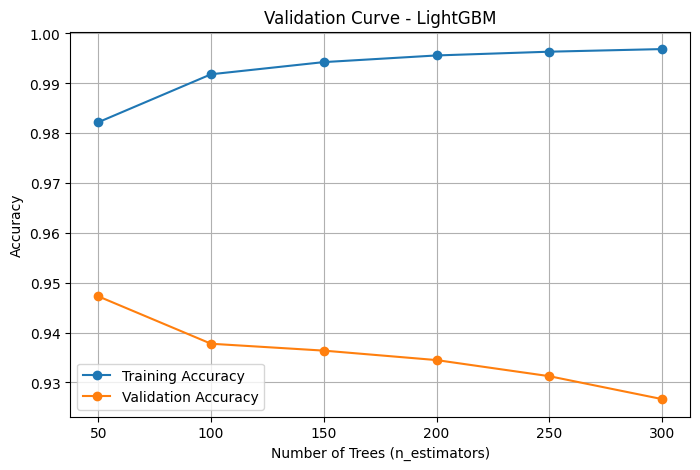

In [ ]:
# ==========================================
# 📌 Model 6: LightGBM Classifier
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, validation_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score
)
import lightgbm as lgb
from lightgbm import LGBMClassifier

# ------------------------------
# Encode target (YES/NO → 1/0)
# ------------------------------
le = LabelEncoder()
data['Status of Sprinkler'] = le.fit_transform(data['Status of Sprinkler'])  # YES=1, NO=0

# ------------------------------
# Split features & target
# ------------------------------
target_col = "Status of Sprinkler"
X = data.drop(columns=[target_col])
y = data[target_col]

# Scaling (optional for tree-based LightGBM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

# ------------------------------
# Build LightGBM model
# ------------------------------
model = LGBMClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:,1]

# ------------------------------
# Evaluation: Classification Report
# ------------------------------
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['OFF','ON']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['OFF','ON'], yticklabels=['OFF','ON'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LightGBM")
plt.show()

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"✅ Accuracy: {acc:.2f}")
print(f"✅ Precision: {prec:.2f}")
print(f"✅ Recall: {rec:.2f}")
print(f"✅ F1 Score: {f1:.2f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - LightGBM")
plt.legend()
plt.show()

# ------------------------------
# Cross-validation
# ------------------------------
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print("Cross-validation accuracies:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# ------------------------------
# Validation Curve (varying n_estimators)
# ------------------------------
param_range = [50, 100, 150, 200, 250, 300]
train_scores, test_scores = validation_curve(
    LGBMClassifier(learning_rate=0.1, max_depth=3, random_state=42),
    X_scaled, y,
    param_name="n_estimators",
    param_range=param_range,
    scoring="accuracy",
    cv=5
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8,5))
plt.plot(param_range, train_mean, label="Training Accuracy", marker='o')
plt.plot(param_range, test_mean, label="Validation Accuracy", marker='o')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Validation Curve - LightGBM")
plt.legend()
plt.grid()
plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.6 MB/s eta 0:00:00
Train shape: (48069, 10) (48069,)
Test shape: (12018, 10) (12018,)
Classification Report:
               precision    recall  f1-score   support

         OFF       0.99      1.00      0.99      8803
          ON       0.99      0.98      0.98      3215

    accuracy                           0.99     12018
   macro avg       0.99      0.99      0.99     12018
weighted avg       0.99      0.99      0.99     12018



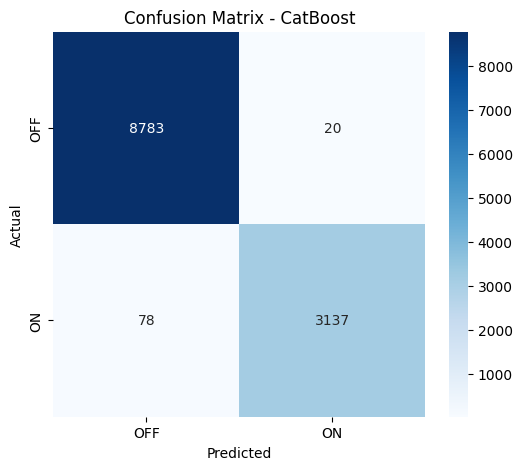

✅ Accuracy: 0.99
✅ Precision: 0.99
✅ Recall: 0.98
✅ F1 Score: 0.98


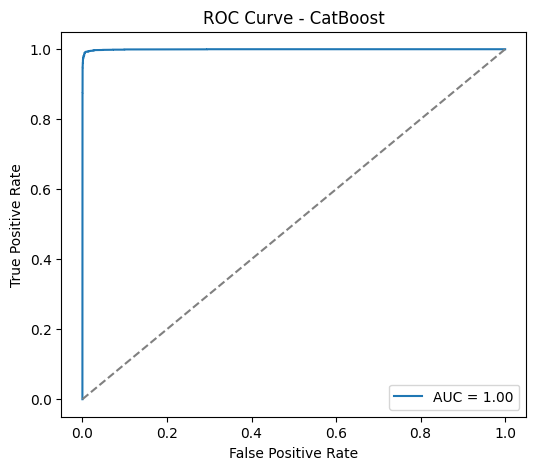

Cross-validation accuracies: [0.90048261 0.93959061 0.90446867 0.99484064 0.99317633]
Mean CV accuracy: 0.946511773766772


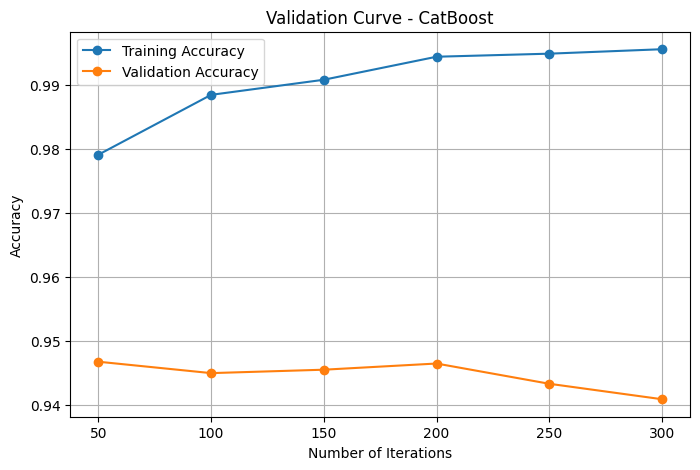

In [ ]:
# ==========================================
# 📌 Model 7: CatBoost Classifier
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install catboost

from sklearn.model_selection import train_test_split, cross_val_score, validation_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score
)
from catboost import CatBoostClassifier

# ------------------------------
# Encode target (YES/NO → 1/0)
# ------------------------------
le = LabelEncoder()
data['Status of Sprinkler'] = le.fit_transform(data['Status of Sprinkler'])  # YES=1, NO=0

# ------------------------------
# Split features & target
# ------------------------------
target_col = "Status of Sprinkler"
X = data.drop(columns=[target_col])
y = data[target_col]

# Scaling (optional for CatBoost)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

# ------------------------------
# Build CatBoost Classifier
# ------------------------------
model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.1,
    depth=3,
    loss_function='Logloss',
    eval_metric='Accuracy',
    verbose=0,
    random_seed=42
)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:,1]

# ------------------------------
# Evaluation: Classification Report
# ------------------------------
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['OFF','ON']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['OFF','ON'], yticklabels=['OFF','ON'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CatBoost")
plt.show()

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"✅ Accuracy: {acc:.2f}")
print(f"✅ Precision: {prec:.2f}")
print(f"✅ Recall: {rec:.2f}")
print(f"✅ F1 Score: {f1:.2f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - CatBoost")
plt.legend()
plt.show()

# ------------------------------
# Cross-validation
# ------------------------------
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print("Cross-validation accuracies:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# ------------------------------
# Validation Curve (varying iterations)
# ------------------------------
param_range = [50, 100, 150, 200, 250, 300]
train_scores, test_scores = validation_curve(
    CatBoostClassifier(learning_rate=0.1, depth=3, loss_function='Logloss', verbose=0, random_seed=42),
    X_scaled, y,
    param_name="iterations",
    param_range=param_range,
    scoring="accuracy",
    cv=5
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8,5))
plt.plot(param_range, train_mean, label="Training Accuracy", marker='o')
plt.plot(param_range, test_mean, label="Validation Accuracy", marker='o')
plt.xlabel("Number of Iterations")
plt.ylabel("Accuracy")
plt.title("Validation Curve - CatBoost")
plt.legend()
plt.grid()
plt.show()

Train shape: (48069, 10) (48069,)
Test shape: (12018, 10) (12018,)
Classification Report:
               precision    recall  f1-score   support

         OFF       1.00      1.00      1.00      8803
          ON       1.00      0.99      0.99      3215

    accuracy                           1.00     12018
   macro avg       1.00      1.00      1.00     12018
weighted avg       1.00      1.00      1.00     12018



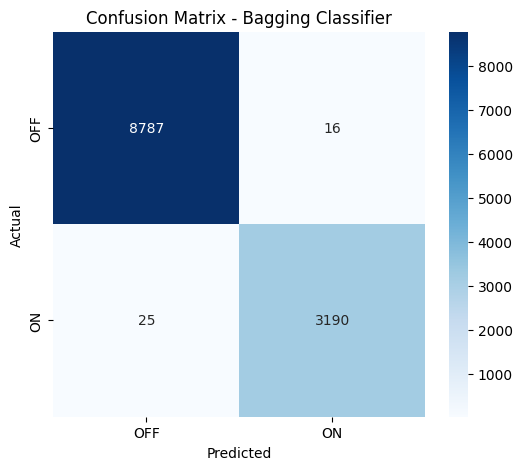

✅ Accuracy: 1.00
✅ Precision: 1.00
✅ Recall: 0.99
✅ F1 Score: 0.99


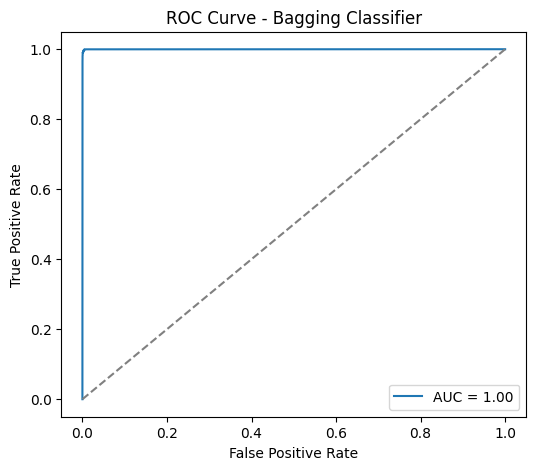

Cross-validation accuracies: [0.91454485 0.93393243 0.8798369  0.97378713 0.99533994]
Mean CV accuracy: 0.9394882503572592


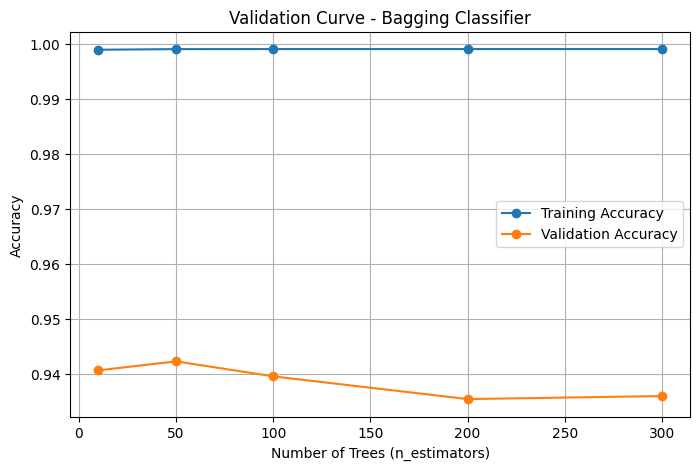

In [ ]:
# ==========================================
# 📌 Bagging Classifier (Fixed for sklearn >= 1.2)
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split, cross_val_score, validation_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score
)

# ------------------------------
# Encode target (YES/NO → 1/0)
# ------------------------------
le = LabelEncoder()
data['Status of Sprinkler'] = le.fit_transform(data['Status of Sprinkler'])  # YES=1, NO=0

# ------------------------------
# Split features & target
# ------------------------------
target_col = "Status of Sprinkler"
X = data.drop(columns=[target_col])
y = data[target_col]

# Scaling (optional for tree-based methods, but keeps consistency)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

# ------------------------------
# Build Bagging Classifier
# ------------------------------
if sklearn.__version__ >= "1.2":
    model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
else:
    model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)

model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# ------------------------------
# Evaluation: Classification Report
# ------------------------------
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['OFF','ON']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['OFF','ON'], yticklabels=['OFF','ON'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Bagging Classifier")
plt.show()

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"✅ Accuracy: {acc:.2f}")
print(f"✅ Precision: {prec:.2f}")
print(f"✅ Recall: {rec:.2f}")
print(f"✅ F1 Score: {f1:.2f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Bagging Classifier")
plt.legend()
plt.show()

# ------------------------------
# Cross-validation
# ------------------------------
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print("Cross-validation accuracies:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# ------------------------------
# Validation Curve (varying n_estimators)
# ------------------------------
param_range = [10, 50, 100, 200, 300]
train_scores, test_scores = validation_curve(
    BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42),
    X_scaled, y,
    param_name="n_estimators",
    param_range=param_range,
    scoring="accuracy",
    cv=5
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8,5))
plt.plot(param_range, train_mean, label="Training Accuracy", marker='o')
plt.plot(param_range, test_mean, label="Validation Accuracy", marker='o')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Validation Curve - Bagging Classifier")
plt.legend()
plt.grid()
plt.show()

Train shape: (48069, 10) (48069,)
Test shape: (12018, 10) (12018,)
Classification Report:
               precision    recall  f1-score   support

         OFF       0.99      1.00      1.00      8803
          ON       0.99      0.98      0.99      3215

    accuracy                           0.99     12018
   macro avg       0.99      0.99      0.99     12018
weighted avg       0.99      0.99      0.99     12018



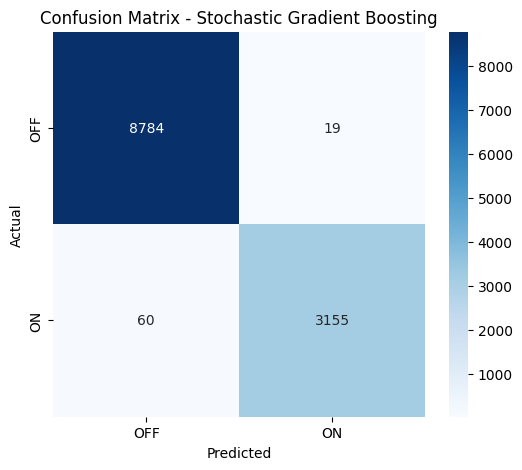

✅ Accuracy: 0.99
✅ Precision: 0.99
✅ Recall: 0.98
✅ F1 Score: 0.99


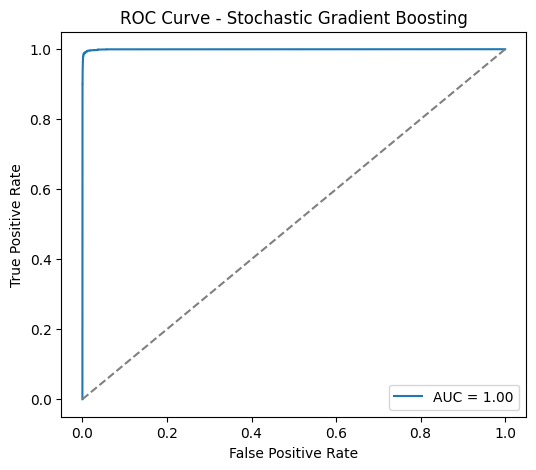

Cross-validation accuracies: [0.90780496 0.93268431 0.90147291 0.90654906 0.99367563]
Mean CV accuracy: 0.9284373722348989


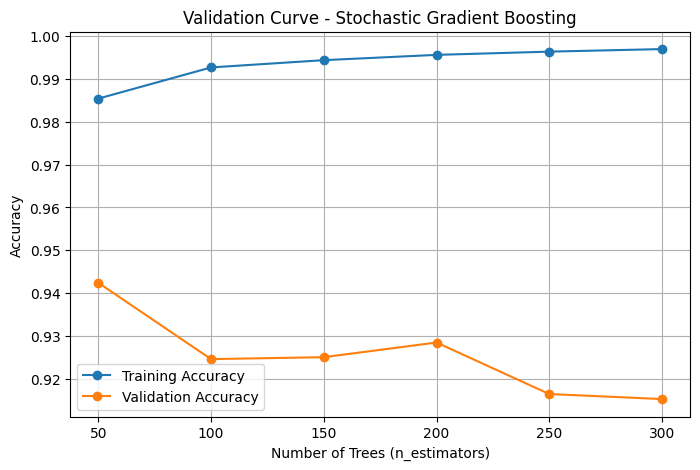

In [ ]:
# ==========================================
# 📌 Model 9: Stochastic Gradient Boosting (SGB)
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, validation_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score
)

# ------------------------------
# Encode target (YES/NO → 1/0)
# ------------------------------
le = LabelEncoder()
data['Status of Sprinkler'] = le.fit_transform(data['Status of Sprinkler'])  # YES=1, NO=0

# ------------------------------
# Split features & target
# ------------------------------
target_col = "Status of Sprinkler"
X = data.drop(columns=[target_col])
y = data[target_col]

# Scaling (optional for tree-based boosting)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

# ------------------------------
# Build Stochastic Gradient Boosting model
# ------------------------------
model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,       # stochastic: use 80% of samples for each tree
    random_state=42
)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:,1]

# ------------------------------
# Evaluation: Classification Report
# ------------------------------
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['OFF','ON']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['OFF','ON'], yticklabels=['OFF','ON'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Stochastic Gradient Boosting")
plt.show()

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"✅ Accuracy: {acc:.2f}")
print(f"✅ Precision: {prec:.2f}")
print(f"✅ Recall: {rec:.2f}")
print(f"✅ F1 Score: {f1:.2f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Stochastic Gradient Boosting")
plt.legend()
plt.show()

# ------------------------------
# Cross-validation
# ------------------------------
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print("Cross-validation accuracies:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# ------------------------------
# Validation Curve (varying n_estimators)
# ------------------------------
param_range = [50, 100, 150, 200, 250, 300]
train_scores, test_scores = validation_curve(
    GradientBoostingClassifier(
        learning_rate=0.1,
        max_depth=3,
        subsample=0.8,
        random_state=42
    ),
    X_scaled, y,
    param_name="n_estimators",
    param_range=param_range,
    scoring="accuracy",
    cv=5
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8,5))
plt.plot(param_range, train_mean, label="Training Accuracy", marker='o')
plt.plot(param_range, test_mean, label="Validation Accuracy", marker='o')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Validation Curve - Stochastic Gradient Boosting")
plt.legend()
plt.grid()
plt.show()

Train shape: (48069, 10) (48069,)
Test shape: (12018, 10) (12018,)
Classification Report:
               precision    recall  f1-score   support

         OFF       0.95      0.99      0.97      8803
          ON       0.95      0.85      0.90      3215

    accuracy                           0.95     12018
   macro avg       0.95      0.92      0.93     12018
weighted avg       0.95      0.95      0.95     12018



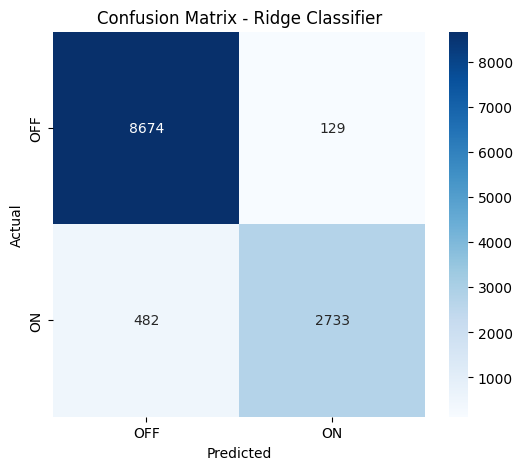

✅ Accuracy: 0.95
✅ Precision: 0.95
✅ Recall: 0.85
✅ F1 Score: 0.90


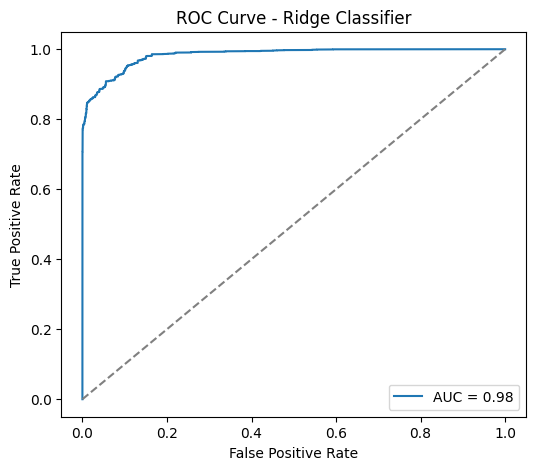

Cross-validation accuracies: [0.92552837 0.93418206 0.84821503 0.99975035 0.99259383]
Mean CV accuracy: 0.9400539284274887


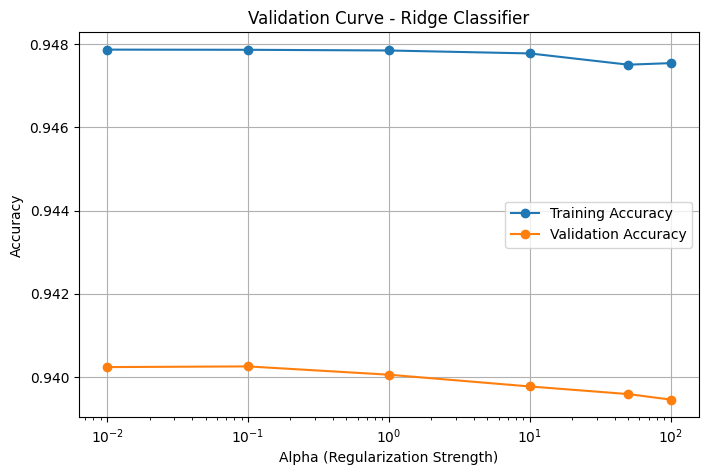

In [ ]:
# ==========================================
# 📌 Model 10: Ridge Classifier
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, validation_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score
)

# ------------------------------
# Encode target (YES/NO → 1/0)
# ------------------------------
le = LabelEncoder()
data['Status of Sprinkler'] = le.fit_transform(data['Status of Sprinkler'])  # YES=1, NO=0

# ------------------------------
# Split features & target
# ------------------------------
target_col = "Status of Sprinkler"
X = data.drop(columns=[target_col])
y = data[target_col]

# Scaling is recommended for Ridge
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

# ------------------------------
# Build Ridge Classifier
# ------------------------------
model = RidgeClassifier(alpha=1.0, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# RidgeClassifier does not provide probability directly; use decision function for ROC
y_scores = model.decision_function(X_test)

# ------------------------------
# Evaluation: Classification Report
# ------------------------------
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['OFF','ON']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['OFF','ON'], yticklabels=['OFF','ON'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Ridge Classifier")
plt.show()

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"✅ Accuracy: {acc:.2f}")
print(f"✅ Precision: {prec:.2f}")
print(f"✅ Recall: {rec:.2f}")
print(f"✅ F1 Score: {f1:.2f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Ridge Classifier")
plt.legend()
plt.show()

# ------------------------------
# Cross-validation
# ------------------------------
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print("Cross-validation accuracies:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# ------------------------------
# Validation Curve (varying alpha)
# ------------------------------
param_range = [0.01, 0.1, 1, 10, 50, 100]
train_scores, test_scores = validation_curve(
    RidgeClassifier(random_state=42),
    X_scaled, y,
    param_name="alpha",
    param_range=param_range,
    scoring="accuracy",
    cv=5
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8,5))
plt.plot(param_range, train_mean, label="Training Accuracy", marker='o')
plt.plot(param_range, test_mean, label="Validation Accuracy", marker='o')
plt.xscale("log")
plt.xlabel("Alpha (Regularization Strength)")
plt.ylabel("Accuracy")
plt.title("Validation Curve - Ridge Classifier")
plt.legend()
plt.grid()
plt.show()

Train shape: (48069, 10) (48069,)
Test shape: (12018, 10) (12018,)
Classification Report:
               precision    recall  f1-score   support

         OFF       0.96      0.99      0.98      8803
          ON       0.97      0.89      0.93      3215

    accuracy                           0.96     12018
   macro avg       0.97      0.94      0.95     12018
weighted avg       0.96      0.96      0.96     12018



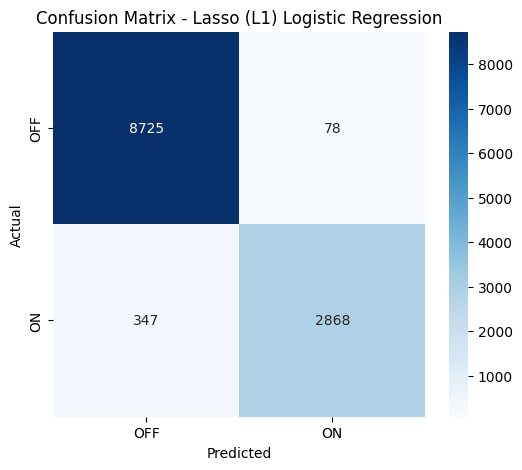

✅ Accuracy: 0.96
✅ Precision: 0.97
✅ Recall: 0.89
✅ F1 Score: 0.93


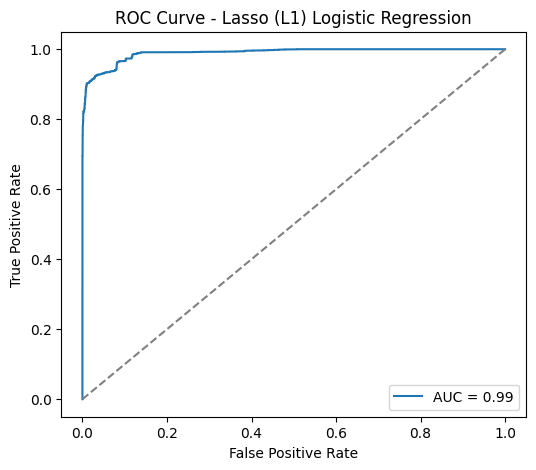

Cross-validation accuracies: [0.93043768 0.9472458  0.88815844 0.99950071 0.99975035]
Mean CV accuracy: 0.9530185955983226


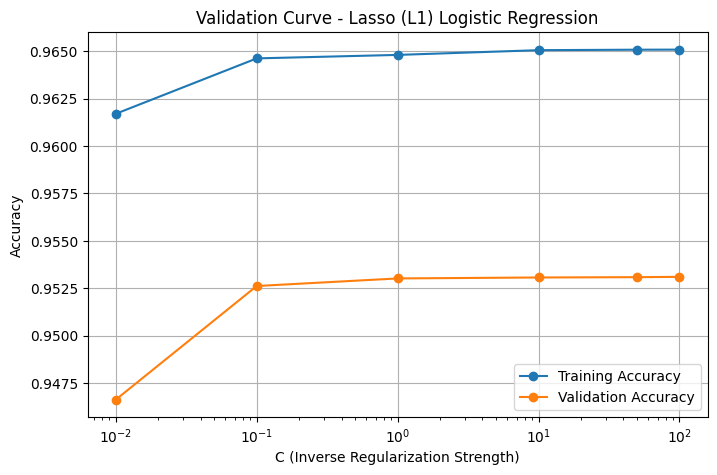

In [ ]:
# ==========================================
# 📌 Model 11: Lasso (L1) Classifier
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, validation_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score
)

# ------------------------------
# Encode target (YES/NO → 1/0)
# ------------------------------
le = LabelEncoder()
data['Status of Sprinkler'] = le.fit_transform(data['Status of Sprinkler'])  # YES=1, NO=0

# ------------------------------
# Split features & target
# ------------------------------
target_col = "Status of Sprinkler"
X = data.drop(columns=[target_col])
y = data[target_col]

# Scaling is recommended for L1 regularized Logistic Regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

# ------------------------------
# Build Lasso (L1) Logistic Regression
# ------------------------------
model = LogisticRegression(
    penalty='l1',
    solver='liblinear',   # liblinear supports L1 penalty
    C=1.0,                # inverse regularization strength
    random_state=42
)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:,1]

# ------------------------------
# Evaluation: Classification Report
# ------------------------------
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['OFF','ON']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['OFF','ON'], yticklabels=['OFF','ON'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Lasso (L1) Logistic Regression")
plt.show()

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"✅ Accuracy: {acc:.2f}")
print(f"✅ Precision: {prec:.2f}")
print(f"✅ Recall: {rec:.2f}")
print(f"✅ F1 Score: {f1:.2f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Lasso (L1) Logistic Regression")
plt.legend()
plt.show()

# ------------------------------
# Cross-validation
# ------------------------------
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print("Cross-validation accuracies:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# ------------------------------
# Validation Curve (varying C)
# ------------------------------
param_range = [0.01, 0.1, 1, 10, 50, 100]
train_scores, test_scores = validation_curve(
    LogisticRegression(penalty='l1', solver='liblinear', random_state=42),
    X_scaled, y,
    param_name="C",
    param_range=param_range,
    scoring="accuracy",
    cv=5
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8,5))
plt.plot(param_range, train_mean, label="Training Accuracy", marker='o')
plt.plot(param_range, test_mean, label="Validation Accuracy", marker='o')
plt.xscale("log")
plt.xlabel("C (Inverse Regularization Strength)")
plt.ylabel("Accuracy")
plt.title("Validation Curve - Lasso (L1) Logistic Regression")
plt.legend()
plt.grid()
plt.show()

Train shape: (48069, 10) (48069,)
Test shape: (12018, 10) (12018,)
Classification Report:
               precision    recall  f1-score   support

         OFF       0.96      0.99      0.98      8803
          ON       0.97      0.89      0.93      3215

    accuracy                           0.96     12018
   macro avg       0.97      0.94      0.95     12018
weighted avg       0.96      0.96      0.96     12018



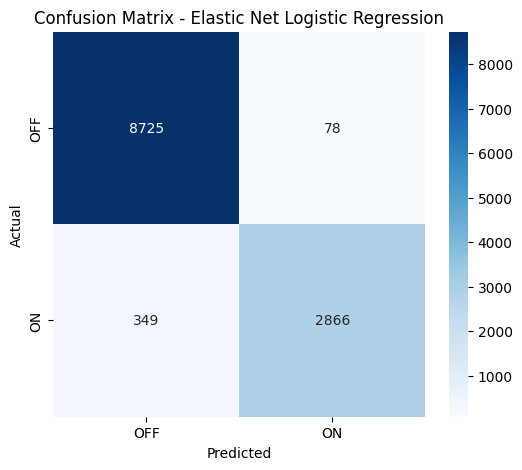

✅ Accuracy: 0.96
✅ Precision: 0.97
✅ Recall: 0.89
✅ F1 Score: 0.93


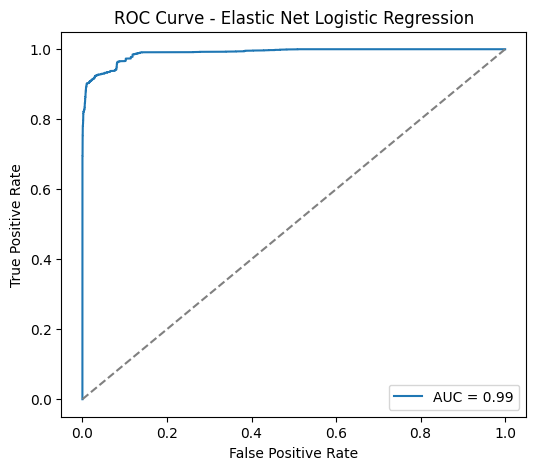

Cross-validation accuracies: [0.93010484 0.94508238 0.88774236 0.99950071 0.99975035]
Mean CV accuracy: 0.952436129030221


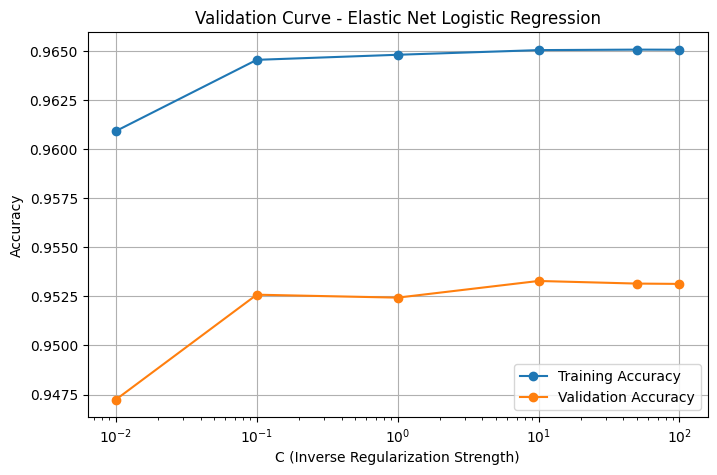

In [ ]:
# ==========================================
# 📌 Model 12: Elastic Net Classifier
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, validation_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score
)

# ------------------------------
# Encode target (YES/NO → 1/0)
# ------------------------------
le = LabelEncoder()
data['Status of Sprinkler'] = le.fit_transform(data['Status of Sprinkler'])  # YES=1, NO=0

# ------------------------------
# Split features & target
# ------------------------------
target_col = "Status of Sprinkler"
X = data.drop(columns=[target_col])
y = data[target_col]

# Scaling is recommended for Elastic Net
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

# ------------------------------
# Build Elastic Net Logistic Regression
# ------------------------------
model = LogisticRegression(
    penalty='elasticnet',
    solver='saga',        # saga supports elasticnet
    l1_ratio=0.5,         # balance between L1 and L2
    C=1.0,
    max_iter=10000,
    random_state=42
)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:,1]

# ------------------------------
# Evaluation: Classification Report
# ------------------------------
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['OFF','ON']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['OFF','ON'], yticklabels=['OFF','ON'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Elastic Net Logistic Regression")
plt.show()

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"✅ Accuracy: {acc:.2f}")
print(f"✅ Precision: {prec:.2f}")
print(f"✅ Recall: {rec:.2f}")
print(f"✅ F1 Score: {f1:.2f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Elastic Net Logistic Regression")
plt.legend()
plt.show()

# ------------------------------
# Cross-validation
# ------------------------------
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print("Cross-validation accuracies:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# ------------------------------
# Validation Curve (varying C)
# ------------------------------
param_range = [0.01, 0.1, 1, 10, 50, 100]
train_scores, test_scores = validation_curve(
    LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=10000, random_state=42),
    X_scaled, y,
    param_name="C",
    param_range=param_range,
    scoring="accuracy",
    cv=5
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8,5))
plt.plot(param_range, train_mean, label="Training Accuracy", marker='o')
plt.plot(param_range, test_mean, label="Validation Accuracy", marker='o')
plt.xscale("log")
plt.xlabel("C (Inverse Regularization Strength)")
plt.ylabel("Accuracy")
plt.title("Validation Curve - Elastic Net Logistic Regression")
plt.legend()
plt.grid()
plt.show()

Train shape: (48069, 10) (48069,)
Test shape: (12018, 10) (12018,)
Classification Report:
               precision    recall  f1-score   support

         OFF       1.00      1.00      1.00      8803
          ON       1.00      0.99      1.00      3215

    accuracy                           1.00     12018
   macro avg       1.00      1.00      1.00     12018
weighted avg       1.00      1.00      1.00     12018



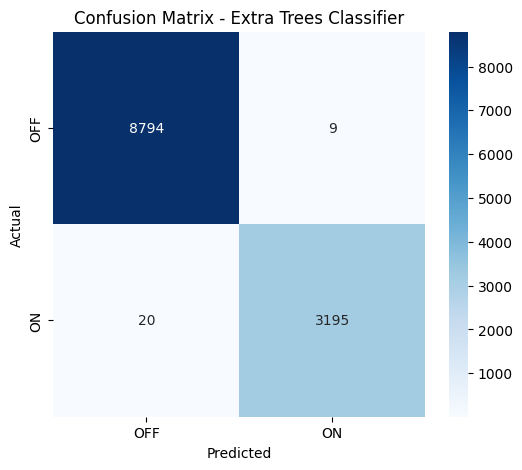

✅ Accuracy: 1.00
✅ Precision: 1.00
✅ Recall: 0.99
✅ F1 Score: 1.00


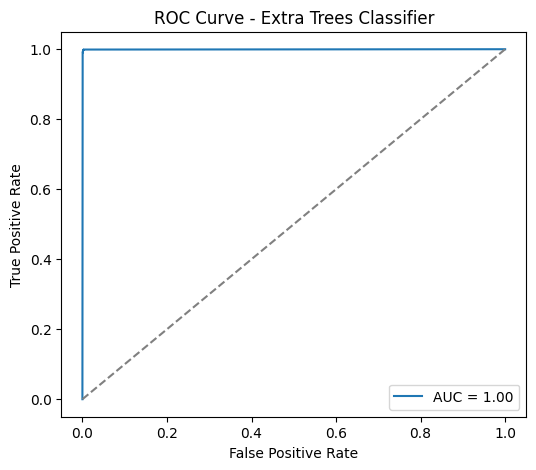

Cross-validation accuracies: [0.91171576 0.96022633 0.89989182 0.99791961 0.99975035]
Mean CV accuracy: 0.9539007748674899


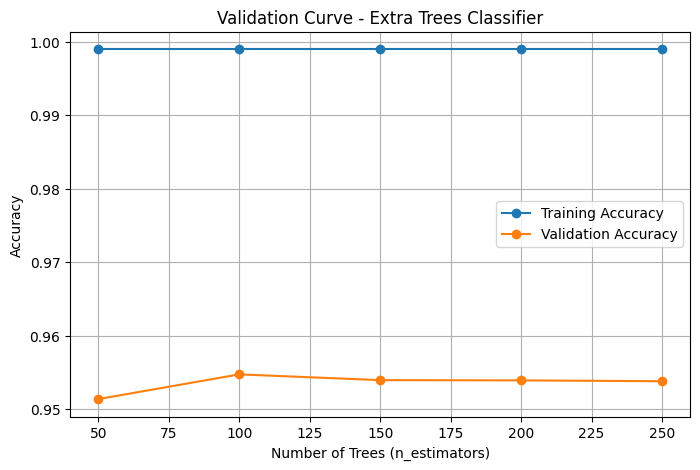

In [ ]:
# ==========================================
# 📌 Model 13: Extra Trees Classifier
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, validation_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score
)

# ------------------------------
# Encode target (YES/NO → 1/0)
# ------------------------------
le = LabelEncoder()
data['Status of Sprinkler'] = le.fit_transform(data['Status of Sprinkler'])  # YES=1, NO=0

# ------------------------------
# Split features & target
# ------------------------------
target_col = "Status of Sprinkler"
X = data.drop(columns=[target_col])
y = data[target_col]

# Scaling is optional for tree-based methods
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

# ------------------------------
# Build Extra Trees Classifier
# ------------------------------
model = ExtraTreesClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:,1]

# ------------------------------
# Evaluation: Classification Report
# ------------------------------
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['OFF','ON']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['OFF','ON'], yticklabels=['OFF','ON'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Extra Trees Classifier")
plt.show()

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"✅ Accuracy: {acc:.2f}")
print(f"✅ Precision: {prec:.2f}")
print(f"✅ Recall: {rec:.2f}")
print(f"✅ F1 Score: {f1:.2f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Extra Trees Classifier")
plt.legend()
plt.show()

# ------------------------------
# Cross-validation
# ------------------------------
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print("Cross-validation accuracies:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# ------------------------------
# Validation Curve (varying n_estimators)
# ------------------------------
param_range = [50, 100, 150, 200, 250]
train_scores, test_scores = validation_curve(
    ExtraTreesClassifier(max_depth=None, random_state=42),
    X_scaled, y,
    param_name="n_estimators",
    param_range=param_range,
    scoring="accuracy",
    cv=5
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8,5))
plt.plot(param_range, train_mean, label="Training Accuracy", marker='o')
plt.plot(param_range, test_mean, label="Validation Accuracy", marker='o')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Validation Curve - Extra Trees Classifier")
plt.legend()
plt.grid()
plt.show()